In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import folium



In [143]:
df = pd.read_csv("processed_data_2_og.csv",encoding = "utf-8")

In [144]:
df.describe()

,Prices,Area,type,certificate,width,length,floors,Latitude,Longitude,District_Mapped,distance_to_beach,distance_to_center,distance_to_airport
count,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000,11287.000000
mean,8.426160,86.855473,0.691415,0.757686,6.095018,16.649025,2.720918,16.054544,108.211440,4.006468,4.910589,3.346805,3.496041
std,11.545246,63.137919,0.461930,0.428502,5.377507,26.736293,2.092892,0.022741,0.026221,1.965558,2.515672,1.823281,1.717770
min,1.000000,0.103000,0.000000,0.000000,0.400000,0.020600,1.000000,15.964750,108.100692,1.000000,0.220626,0.052489,0.299881
25%,3.600000,60.000000,0.000000,1.000000,4.500000,12.000000,2.000000,16.041185,108.194250,2.000000,3.264107,2.117694,2.075375
50%,5.250000,80.000000,1.000000,1.000000,5.000000,16.000000,3.000000,16.058362,108.215596,4.000000,4.282145,3.148430,3.429598
75%,8.900000,100.000000,1.000000,1.000000,6.500000,20.000000,3.000000,16.069840,108.231987,6.000000,6.699319,4.406182,4.614104
max,315.000000,950.000000,1.000000,1.000000,420.000000,2020.000000,123.000000,16.109347,108.286588,7.000000,15.749925,13.215868,13.615339


In [145]:
df['Prices_normalized'] = (df['Prices'] - df['Prices'].min()) / (df['Prices'].max() - df['Prices'].min())

In [146]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
print("Upper bound for price:",uppper_boundary)
df['prices_capped'] = df['Prices']
df.loc[(df.Prices>uppper_boundary),'prices_capped'] = uppper_boundary

Upper bound for price: 43.0618972051879


In [147]:
df['prices_capped'].unique()

array([ 4.1       ,  3.3       , 15.        ,  6.5       , 11.        ,
        7.2       ,  2.9       ,  3.5       ,  4.7       , 25.        ,
        5.2       ,  6.6       ,  5.7       ,  6.7       ,  3.75      ,
        6.8       ,  4.75      ,  6.4       ,  2.75      ,  2.6       ,
        3.8       ,  3.35      ,  2.55      ,  1.75      ,  3.69      ,
        5.95      ,  6.        ,  2.8       ,  3.2       ,  2.15      ,
        3.65      ,  1.65      ,  2.7       ,  3.15      ,  1.85      ,
        2.83      ,  1.49      ,  5.35      ,  3.9       ,  6.35      ,
        5.8       ,  8.5       ,  4.15      ,  4.9       ,  7.5       ,
        5.        ,  4.8       , 18.8       ,  4.4       ,  3.55      ,
       14.        , 24.        ,  3.85      ,  2.85      ,  4.3       ,
        4.2       , 20.        ,  5.4       ,  2.25      ,  2.2       ,
        2.1       ,  1.5       ,  2.05      ,  7.3       , 16.5       ,
       14.2       ,  3.995     , 16.        , 43.06189721,  9.  

In [148]:
df['log_prices'] = np.log(df['Prices'])

<Axes: xlabel='prices_capped', ylabel='Count'>

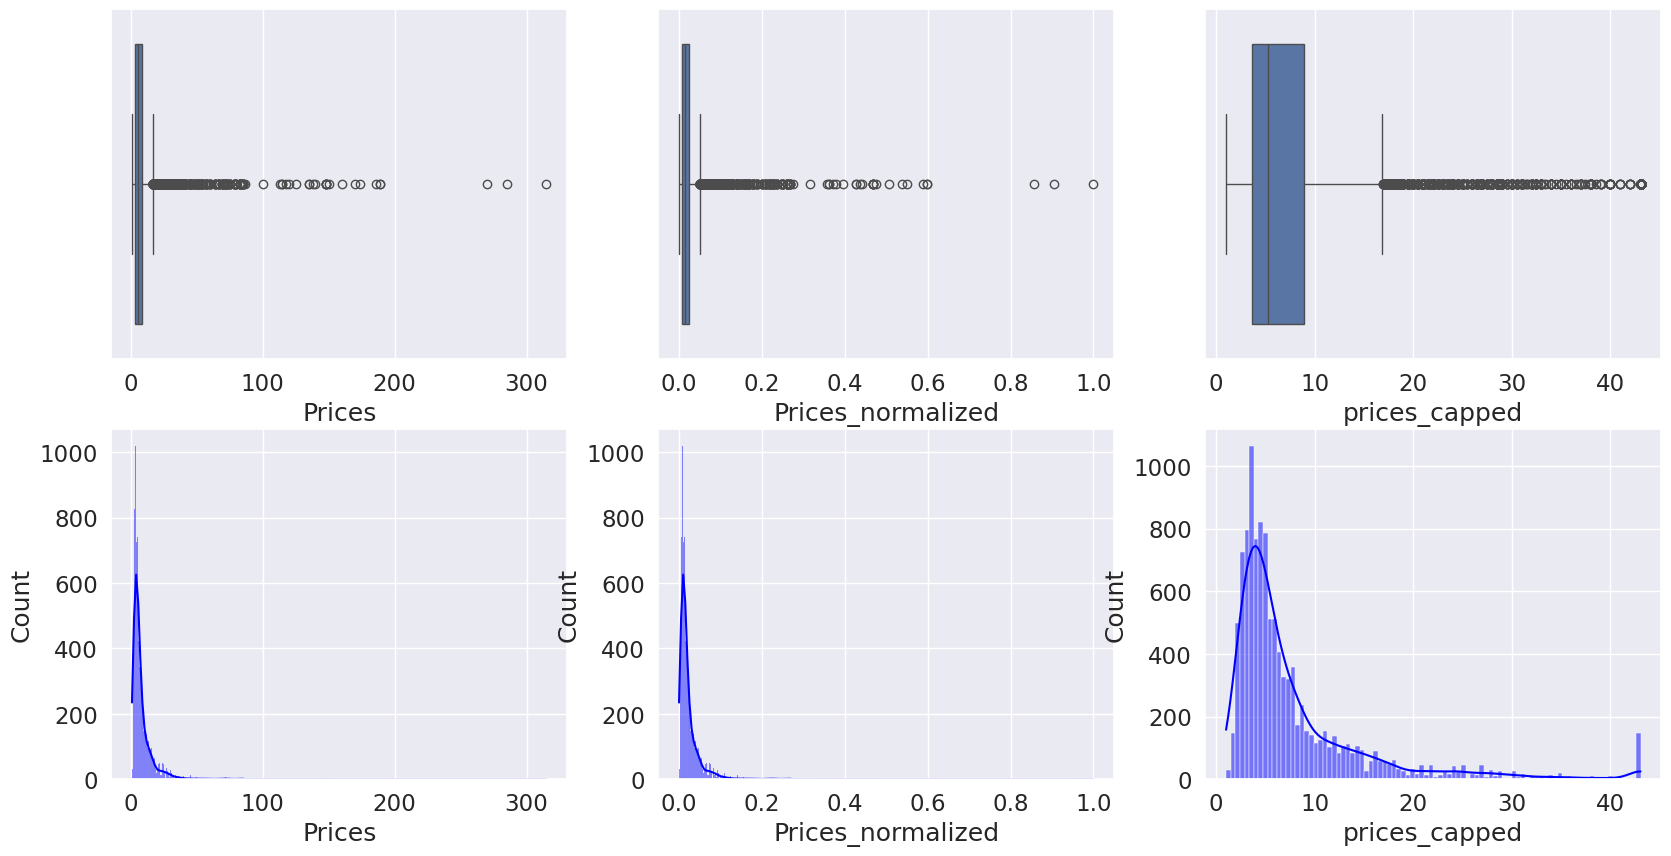

In [149]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20,10))
sns.boxplot(data=df,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices_normalized',ax=axes[0][1])
sns.boxplot(data=df,x='prices_capped',ax=axes[0][2])

sns.histplot(df["Prices"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df["Prices_normalized"], kde=True, color='blue', ax=axes[1][1])
sns.histplot(df["prices_capped"], kde=True, color='blue', ax=axes[1][2])

In [150]:
print("Mean of prices: ", np.mean(df["Prices"]))
print("Mean of prices_capped: ", np.mean(df["prices_capped"]))
print("std of Prices: ", np.std(df["Prices"]))
print("std of Prices_capped: ", np.std(df["prices_capped"]))


Mean of prices:  8.426159676125812
Mean of prices_capped:  7.942453810011044
std of Prices:  11.544734391723878
std of Prices_capped:  7.424566514374364


### Area

In [151]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Upper bound for area:",uppper_boundary)
df['Area_capped'] = df['Area']
df.loc[(df.Area>uppper_boundary),'Area_capped'] = uppper_boundary
df['log_Area'] = np.log(df['Area'])

Upper bound for area: 276.2692297258002


<Axes: xlabel='log_Area', ylabel='Count'>

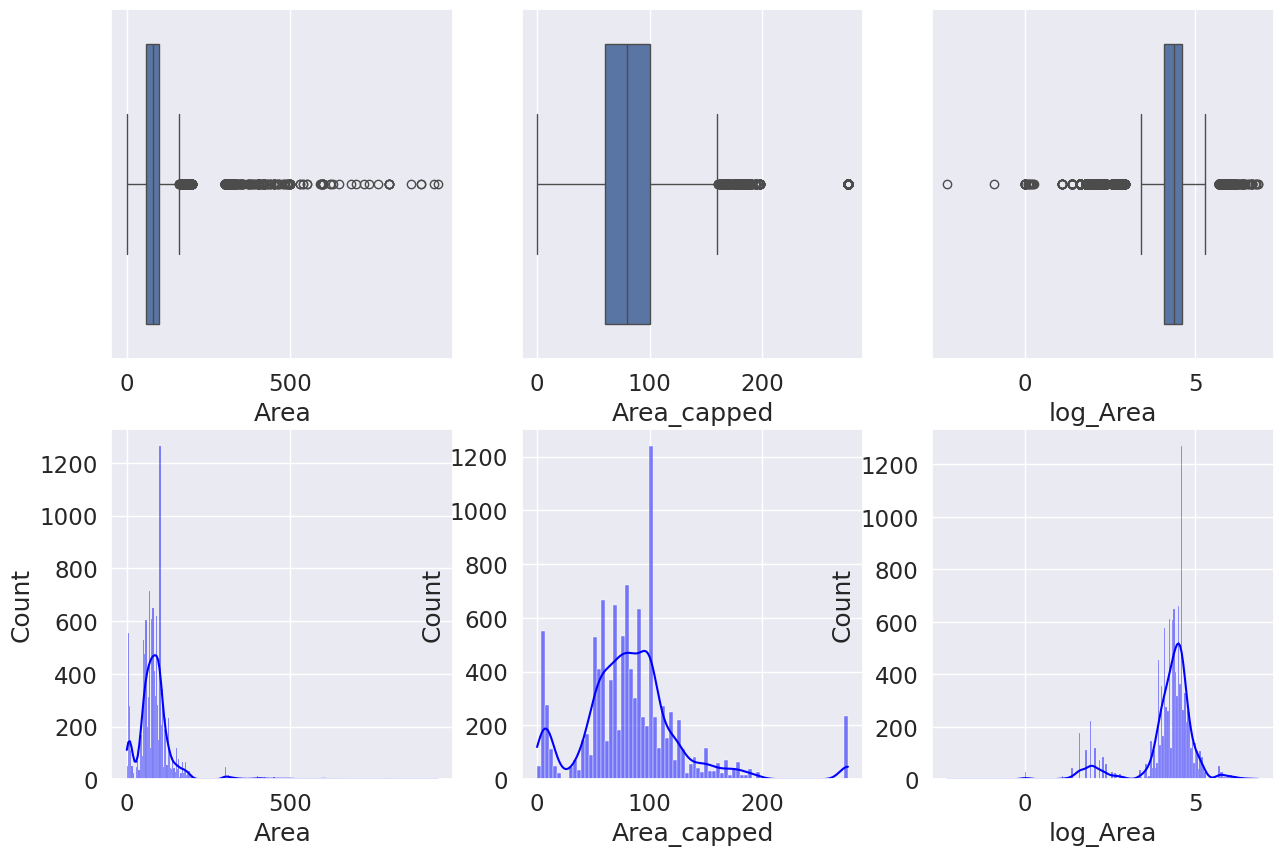

In [152]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='Area',ax=axes[0][0])
sns.boxplot(data=df,x='Area_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_Area',ax=axes[0][2])
sns.histplot(df["Area"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df["Area_capped"], kde=True, color='blue', ax=axes[1][1])
sns.histplot(df["log_Area"], kde=True, color='blue', ax=axes[1][2])

In [153]:
print("Mean of Area: ", np.mean(df["Area"]))
print("Mean of Area_capped: ", np.mean(df["Area_capped"]))
print("std of Area: ", np.std(df["Area"]))
print("std of Area_capped: ", np.std(df["Area_capped"]))


Mean of Area:  86.85547250981793
Mean of Area_capped:  84.07331670623988
std of Area:  63.13512207909963
std of Area_capped:  46.49267960747237


### Floors

In [154]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Upper bound for floors:",uppper_boundary)
df['floors_capped'] = df['floors']
df.loc[(df.floors_capped>uppper_boundary),'floors_capped'] = int(uppper_boundary)
# df['log_floors'] = np.log(df['floors'])

Upper bound for floors: 8.99959315952584


<Axes: xlabel='floors_capped', ylabel='Count'>

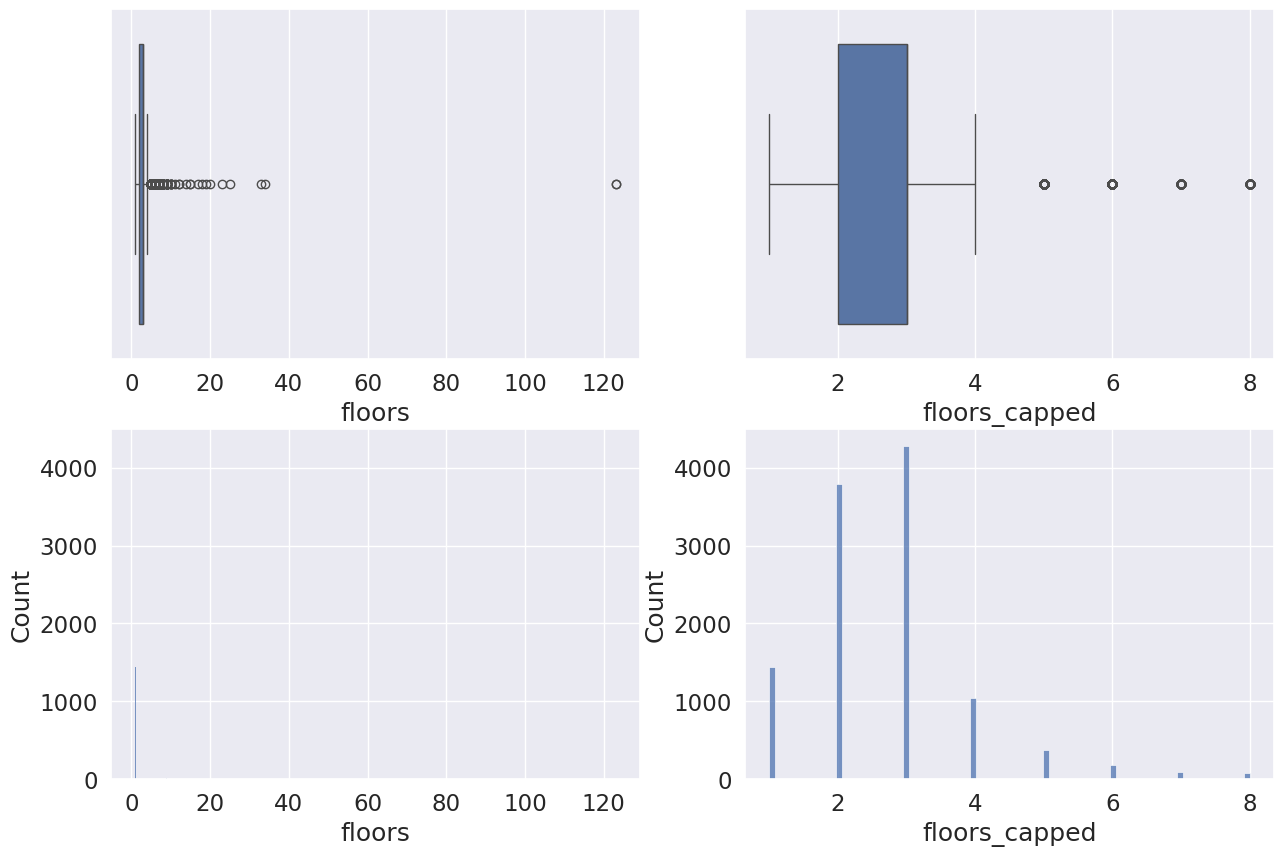

In [155]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='floors',ax=axes[0][0])
sns.boxplot(data=df,x='floors_capped',ax=axes[0][1])
sns.histplot(data=df,x='floors',ax=axes[1][0])
sns.histplot(data=df,x='floors_capped',ax=axes[1][1])

In [156]:
print("Mean of floors: ", np.mean(df["floors"]))
print("Mean of floors_capped: ", np.mean(df["floors_capped"]))
print("std of floors: ", np.std(df["floors"]))
print("std of floors_capped: ", np.std(df["floors_capped"]))


Mean of floors:  2.720917870116063
Mean of floors_capped:  2.6842385044741737
std of floors:  2.0927990485923638
std of floors_capped:  1.1952412223851152


### Width

In [157]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Upper bound for width:",uppper_boundary)
df['width_capped'] = df['width']
df.loc[(df.width_capped>uppper_boundary),'width_capped'] = uppper_boundary
df['log_width'] = np.log(df['width'])

Upper bound for width: 22.227540267464


<Axes: xlabel='log_width', ylabel='Count'>

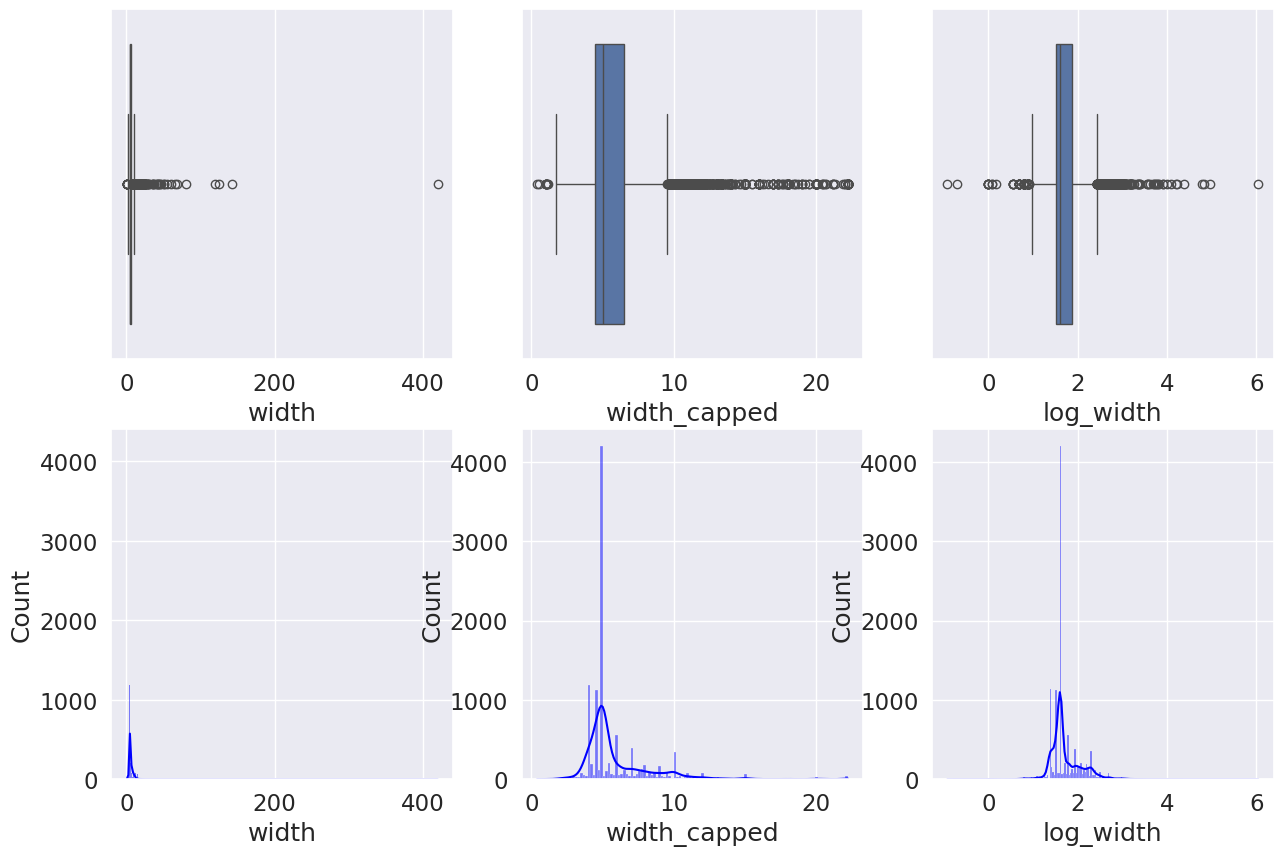

In [158]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='width',ax=axes[0][0])
sns.boxplot(data=df,x='width_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_width',ax=axes[0][2])
sns.histplot(df["width"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df["width_capped"], kde=True, color='blue', ax=axes[1][1])
sns.histplot(df["log_width"], kde=True, color='blue',ax=axes[1][2])

In [159]:
print("Mean of width: ", np.mean(df["width"]))
print("Mean of width_capped: ", np.mean(df["width_capped"]))
print("std of width: ", np.std(df["width"]))
print("std of width_capped: ", np.std(df["width_capped"]))


Mean of width:  6.095018101540056
Mean of width_capped:  5.983231999691296
std of width:  5.377269166505125
std of width_capped:  2.612683861497646


### Length

In [160]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Upper bound for length:",uppper_boundary)
df['length_capped'] = df['length']
df.loc[(df.length_capped>uppper_boundary),'length_capped'] = uppper_boundary
df['log_length'] = np.log(df['length'])

Upper bound for length: 96.85790292073943


<Axes: xlabel='log_length', ylabel='Count'>

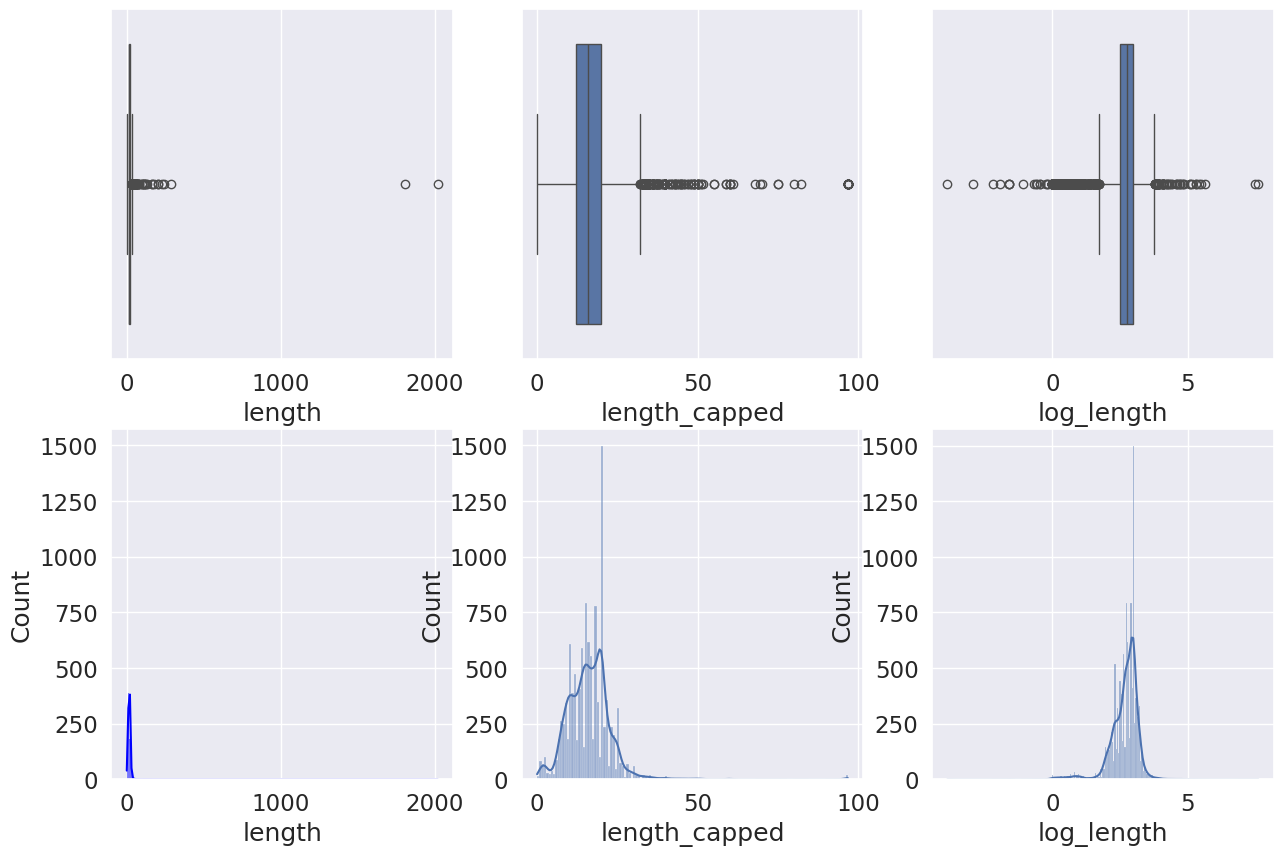

In [161]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='length',ax=axes[0][0])
sns.boxplot(data=df,x='length_capped',ax=axes[0][1])
sns.boxplot(data=df,x='log_length',ax=axes[0][2])
sns.histplot(df["length"], kde=True, color='blue', ax=axes[1][0])
sns.histplot(df['length_capped'],kde = True, ax=axes[1][1])
sns.histplot(df['log_length'],kde = True, ax=axes[1][2])

In [162]:
print("Mean of length: ", np.mean(df["length"]))
print("Mean of length_capped: ", np.mean(df["length_capped"]))
print("std of length: ", np.std(df["length"]))
print("std of length_capped: ", np.std(df["length_capped"]))


Mean of length:  16.64902538802045
Mean of length_capped:  16.23733939134233
std of length:  26.735108100313198
std of length_capped:  7.233438662124715


### Distance to center

In [163]:
# uppper_boundary=df['distance_to_center'].mean() + 3* df['distance_to_center'].std()
# print("Upper bound for distance_to_center:",uppper_boundary)
# df_copy.loc[(df_copy.distance_to_center>uppper_boundary),'distance_to_center'] = uppper_boundary
# df['log_distance_to_center'] = np.log(df['distance_to_center'])

<Axes: xlabel='distance_to_center', ylabel='Count'>

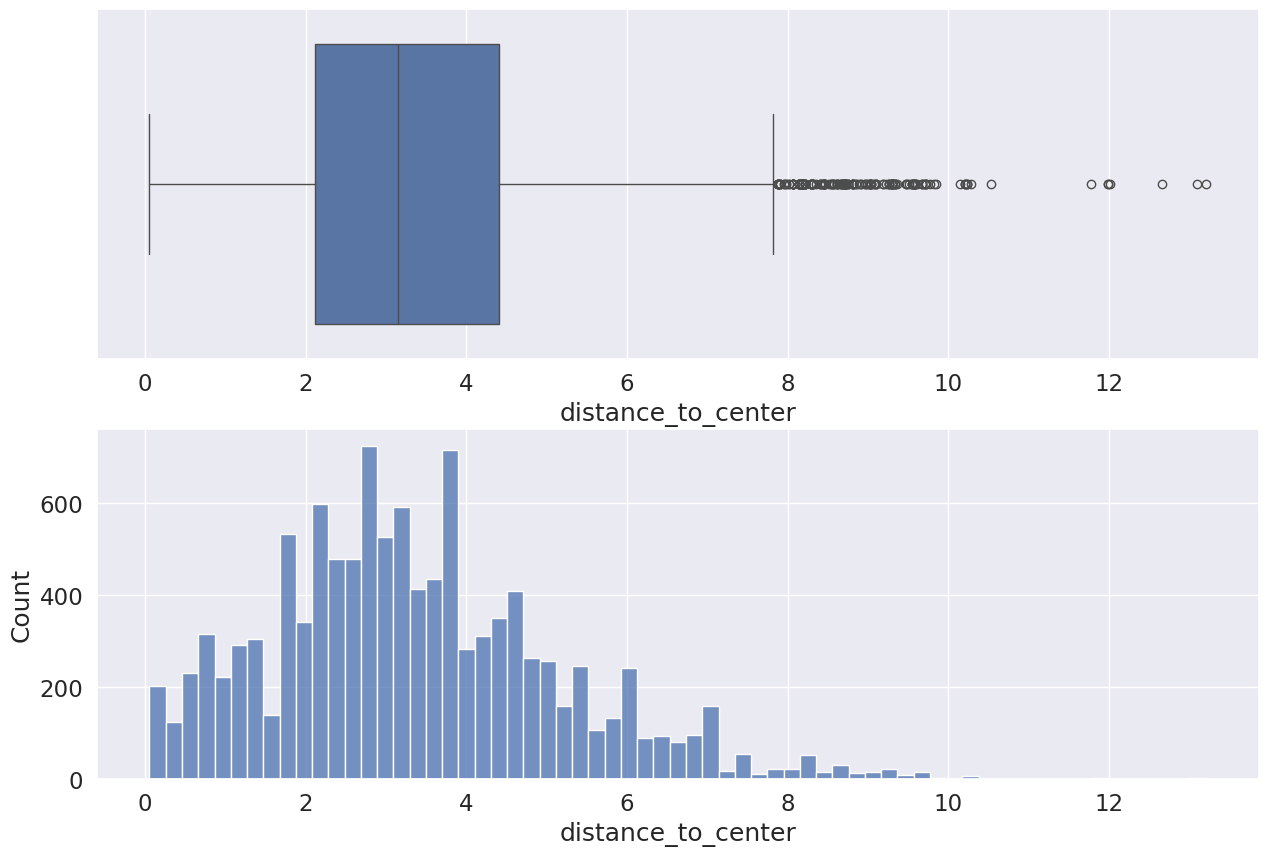

In [164]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_center',ax=axes[0])
sns.histplot(data=df,x='distance_to_center',ax=axes[1])

### Distance to beach

In [165]:
uppper_boundary=df['distance_to_beach'].mean() + 3* df['distance_to_beach'].std()
print("Upper bound for distance_to_beach:",uppper_boundary)

Upper bound for distance_to_beach: 12.457605460265738


<Axes: xlabel='distance_to_beach', ylabel='Count'>

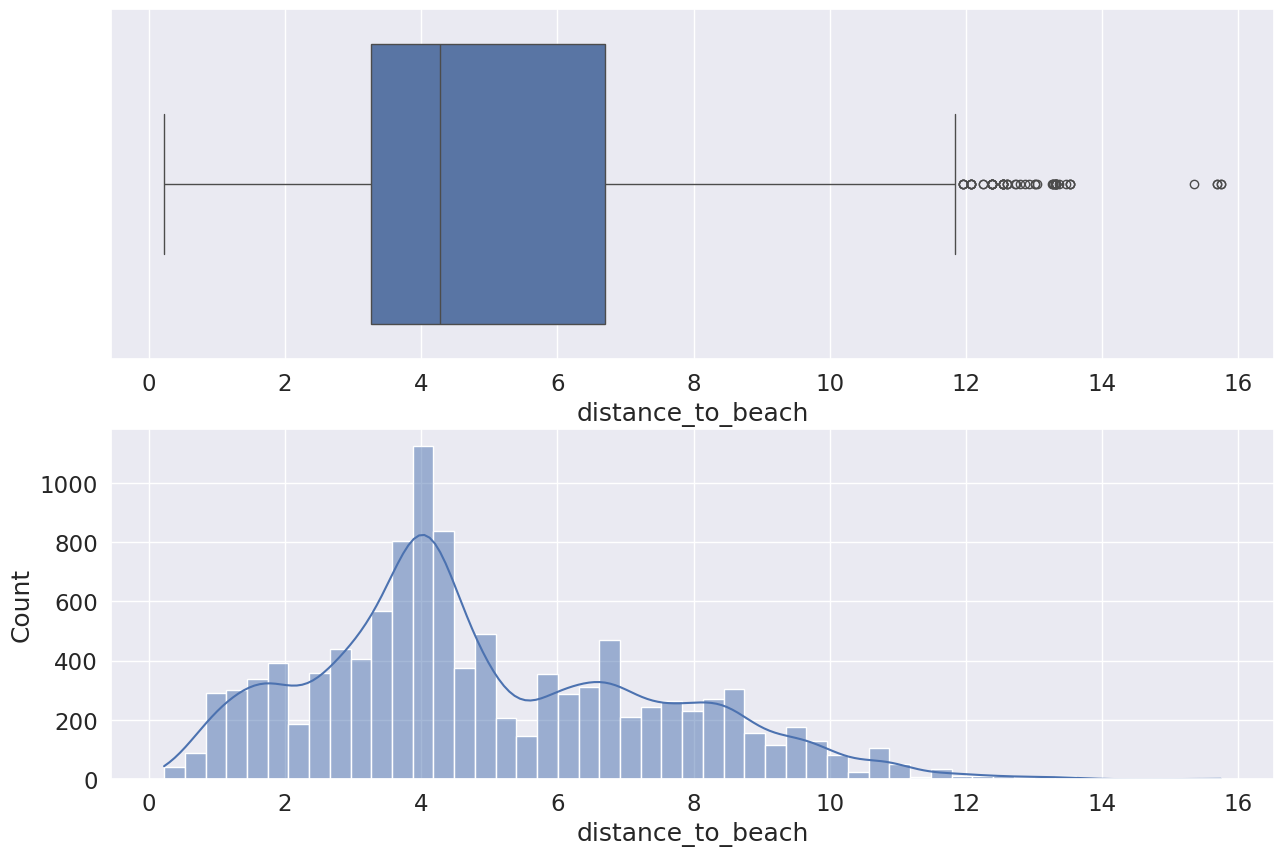

In [166]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_beach',ax=axes[0])
sns.histplot(df['distance_to_beach'],kde= True, ax=axes[1])

In [167]:
uppper_boundary=df['distance_to_airport'].mean() + 3* df['distance_to_airport'].std()
print("Upper bound for distance_to_airport:",uppper_boundary)

Upper bound for distance_to_airport: 8.649350481162406


### Distance to airport

<Axes: xlabel='distance_to_airport', ylabel='Count'>

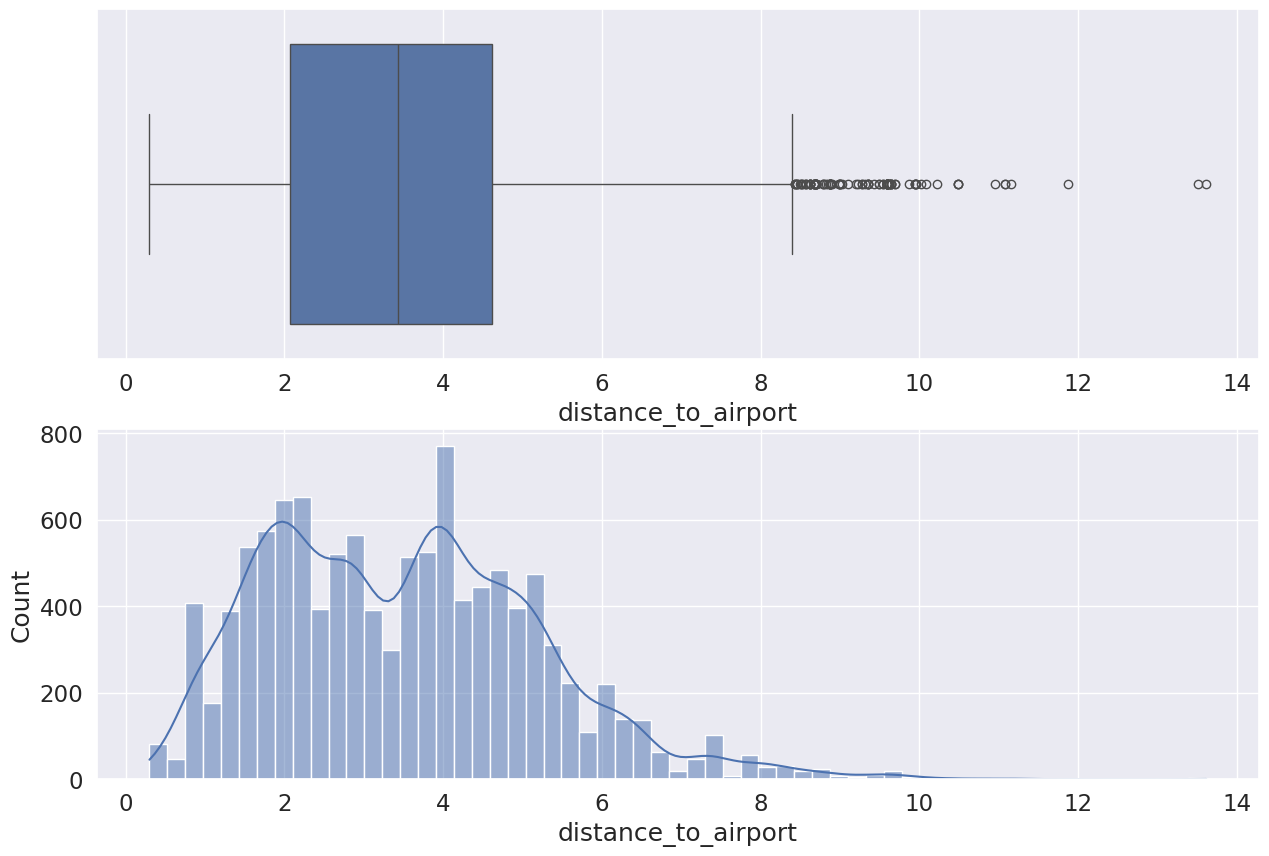

In [168]:
fig, axes = plt.subplots(ncols=1,nrows=2, figsize=(15,10))
sns.boxplot(data=df,x='distance_to_airport',ax=axes[0])
sns.histplot(df['distance_to_airport'],kde=True, ax=axes[1])

## Plotting categories

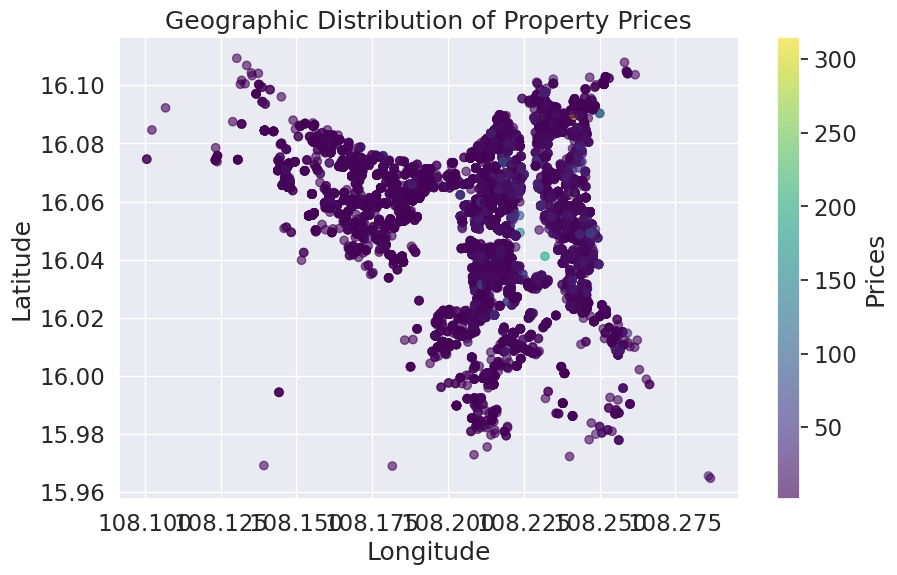

In [169]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Prices'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Property Prices')
plt.show()


In [170]:
# lat = 16.04906249819706
# long = 108.20384235491143
# zoom = 12
# gmap2 = folium.Map(location=(lat, long), zoom_start=zoom)
# def _addMarker(gmap):
#     for i, row in df.iterrows():
#         marker = folium.Marker(location=(row['latitude'], row['longitude']))
#         marker.add_to(gmap)

# _addMarker(gmap2)
# gmap2.save("foliumMarkerMultiple.html")

### Housing prices at different districts

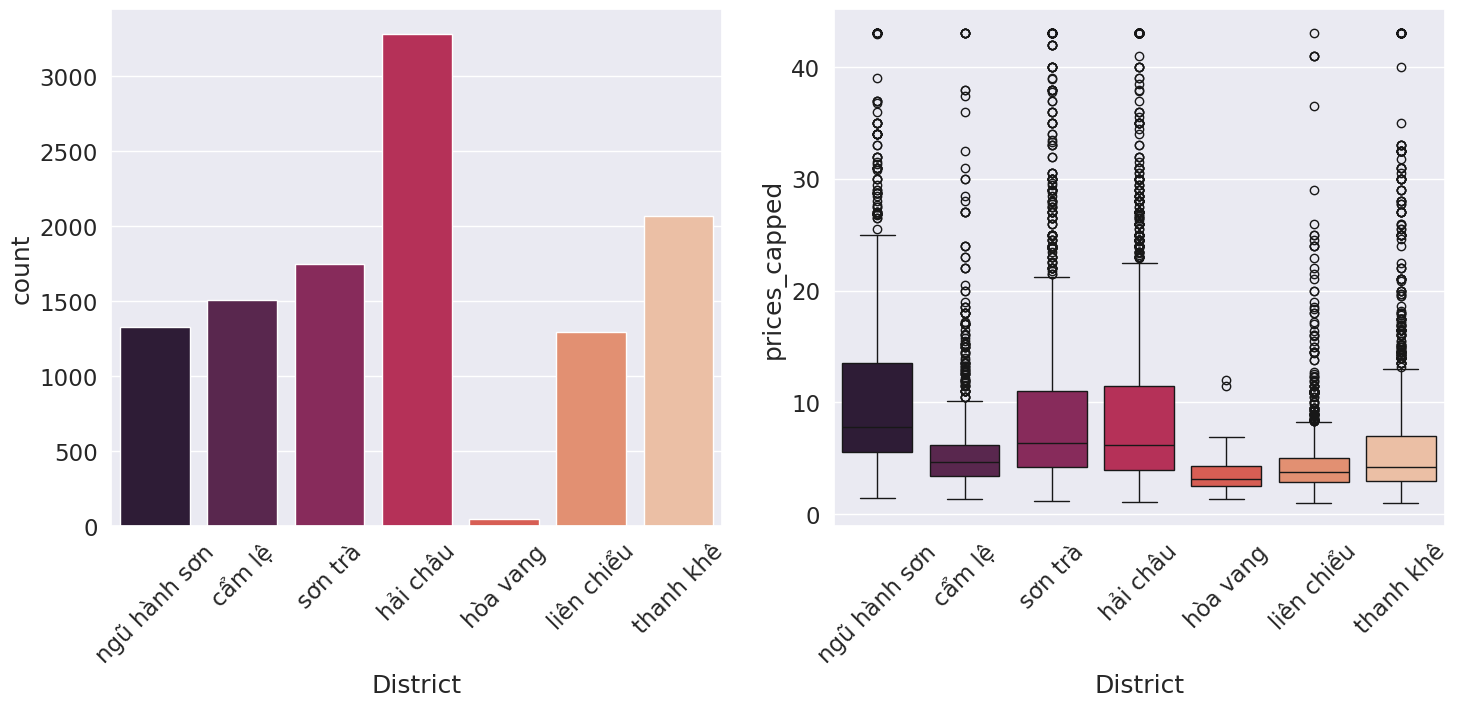

In [171]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("rocket"), hue =df[x], legend=False)
    ax1.set_xticks(range(len(df[x].unique())))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.prices_capped, palette=("rocket"), hue =df[x], legend=False)
    ax2.set_xticks(range(len(df[x].unique())))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

### Housing prices with certificates compared to non-certificate

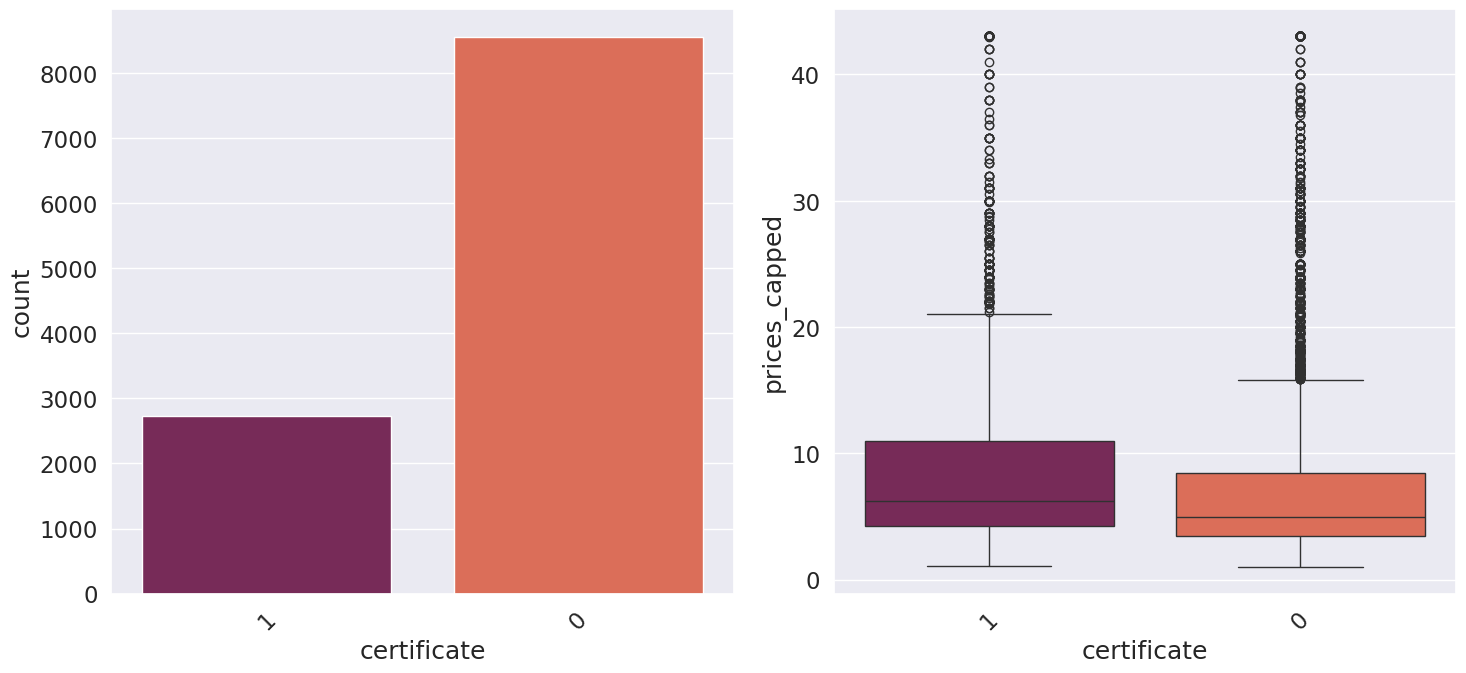

In [172]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

### Housing prices at front compared to alley ones

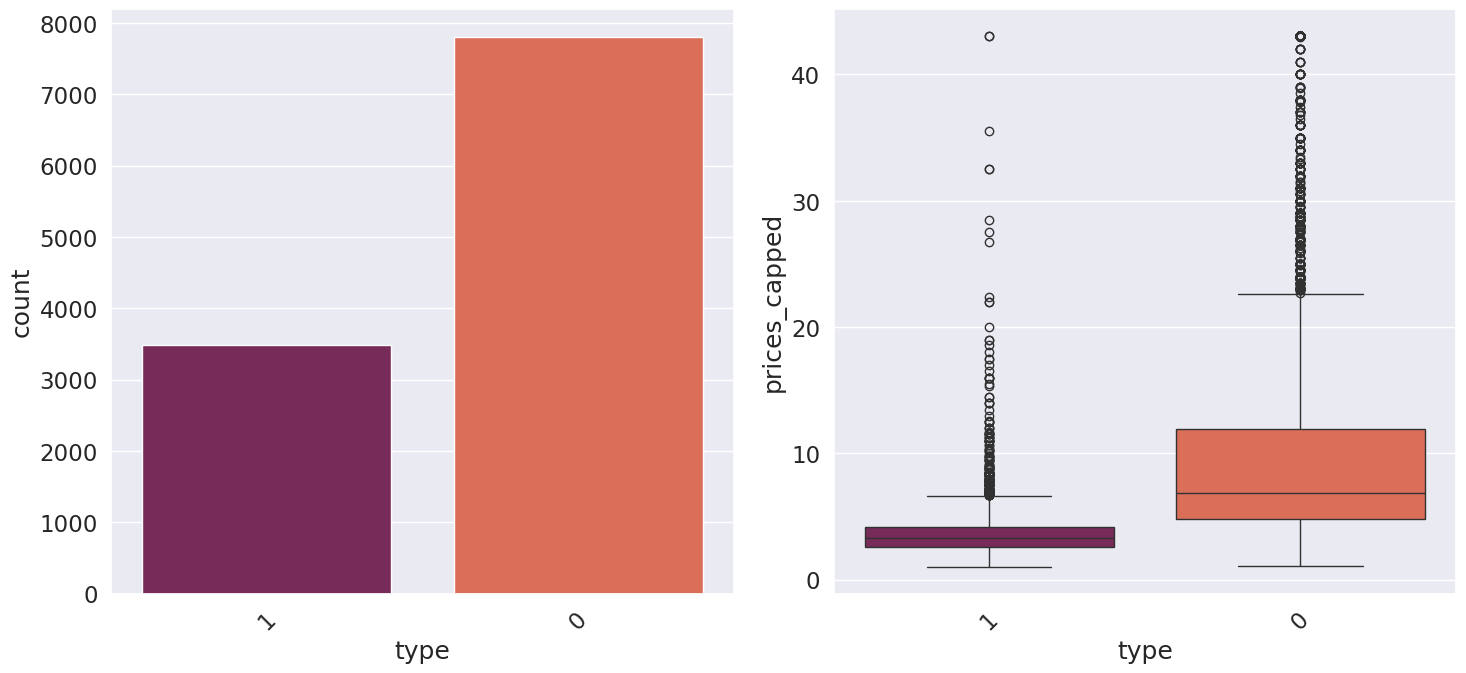

In [173]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

### Housing prices with different floors

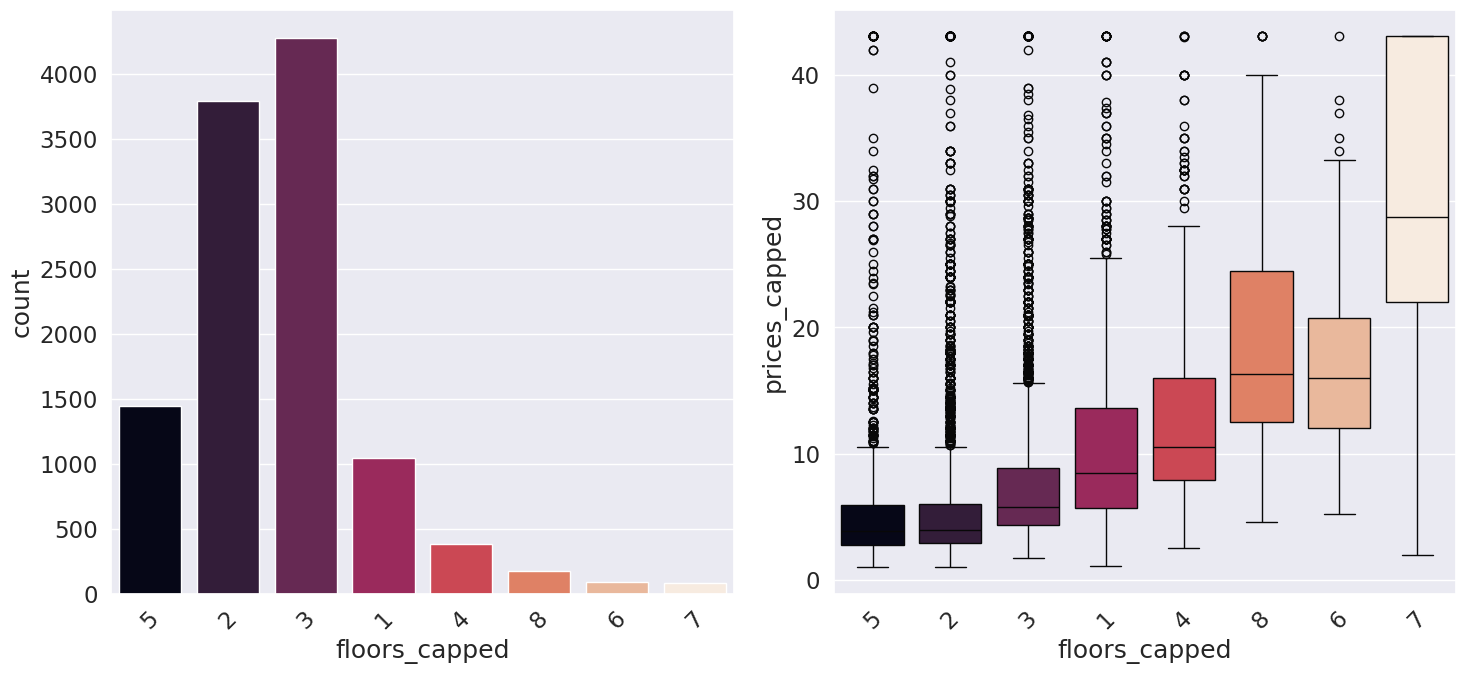

In [174]:
def plot_count_2(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("rocket"), hue =df[x], legend=False)
    ax1.set_xticks(range(len(df[x].unique())))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.prices_capped, palette=("rocket"), hue =df[x], legend=False)
    ax2.set_xticks(range(len(df[x].unique())))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
plt.figure(figsize=(15,20))
plot_count_2('floors_capped', 1)
plt.tight_layout()

### Housing prices with with each ward within each district

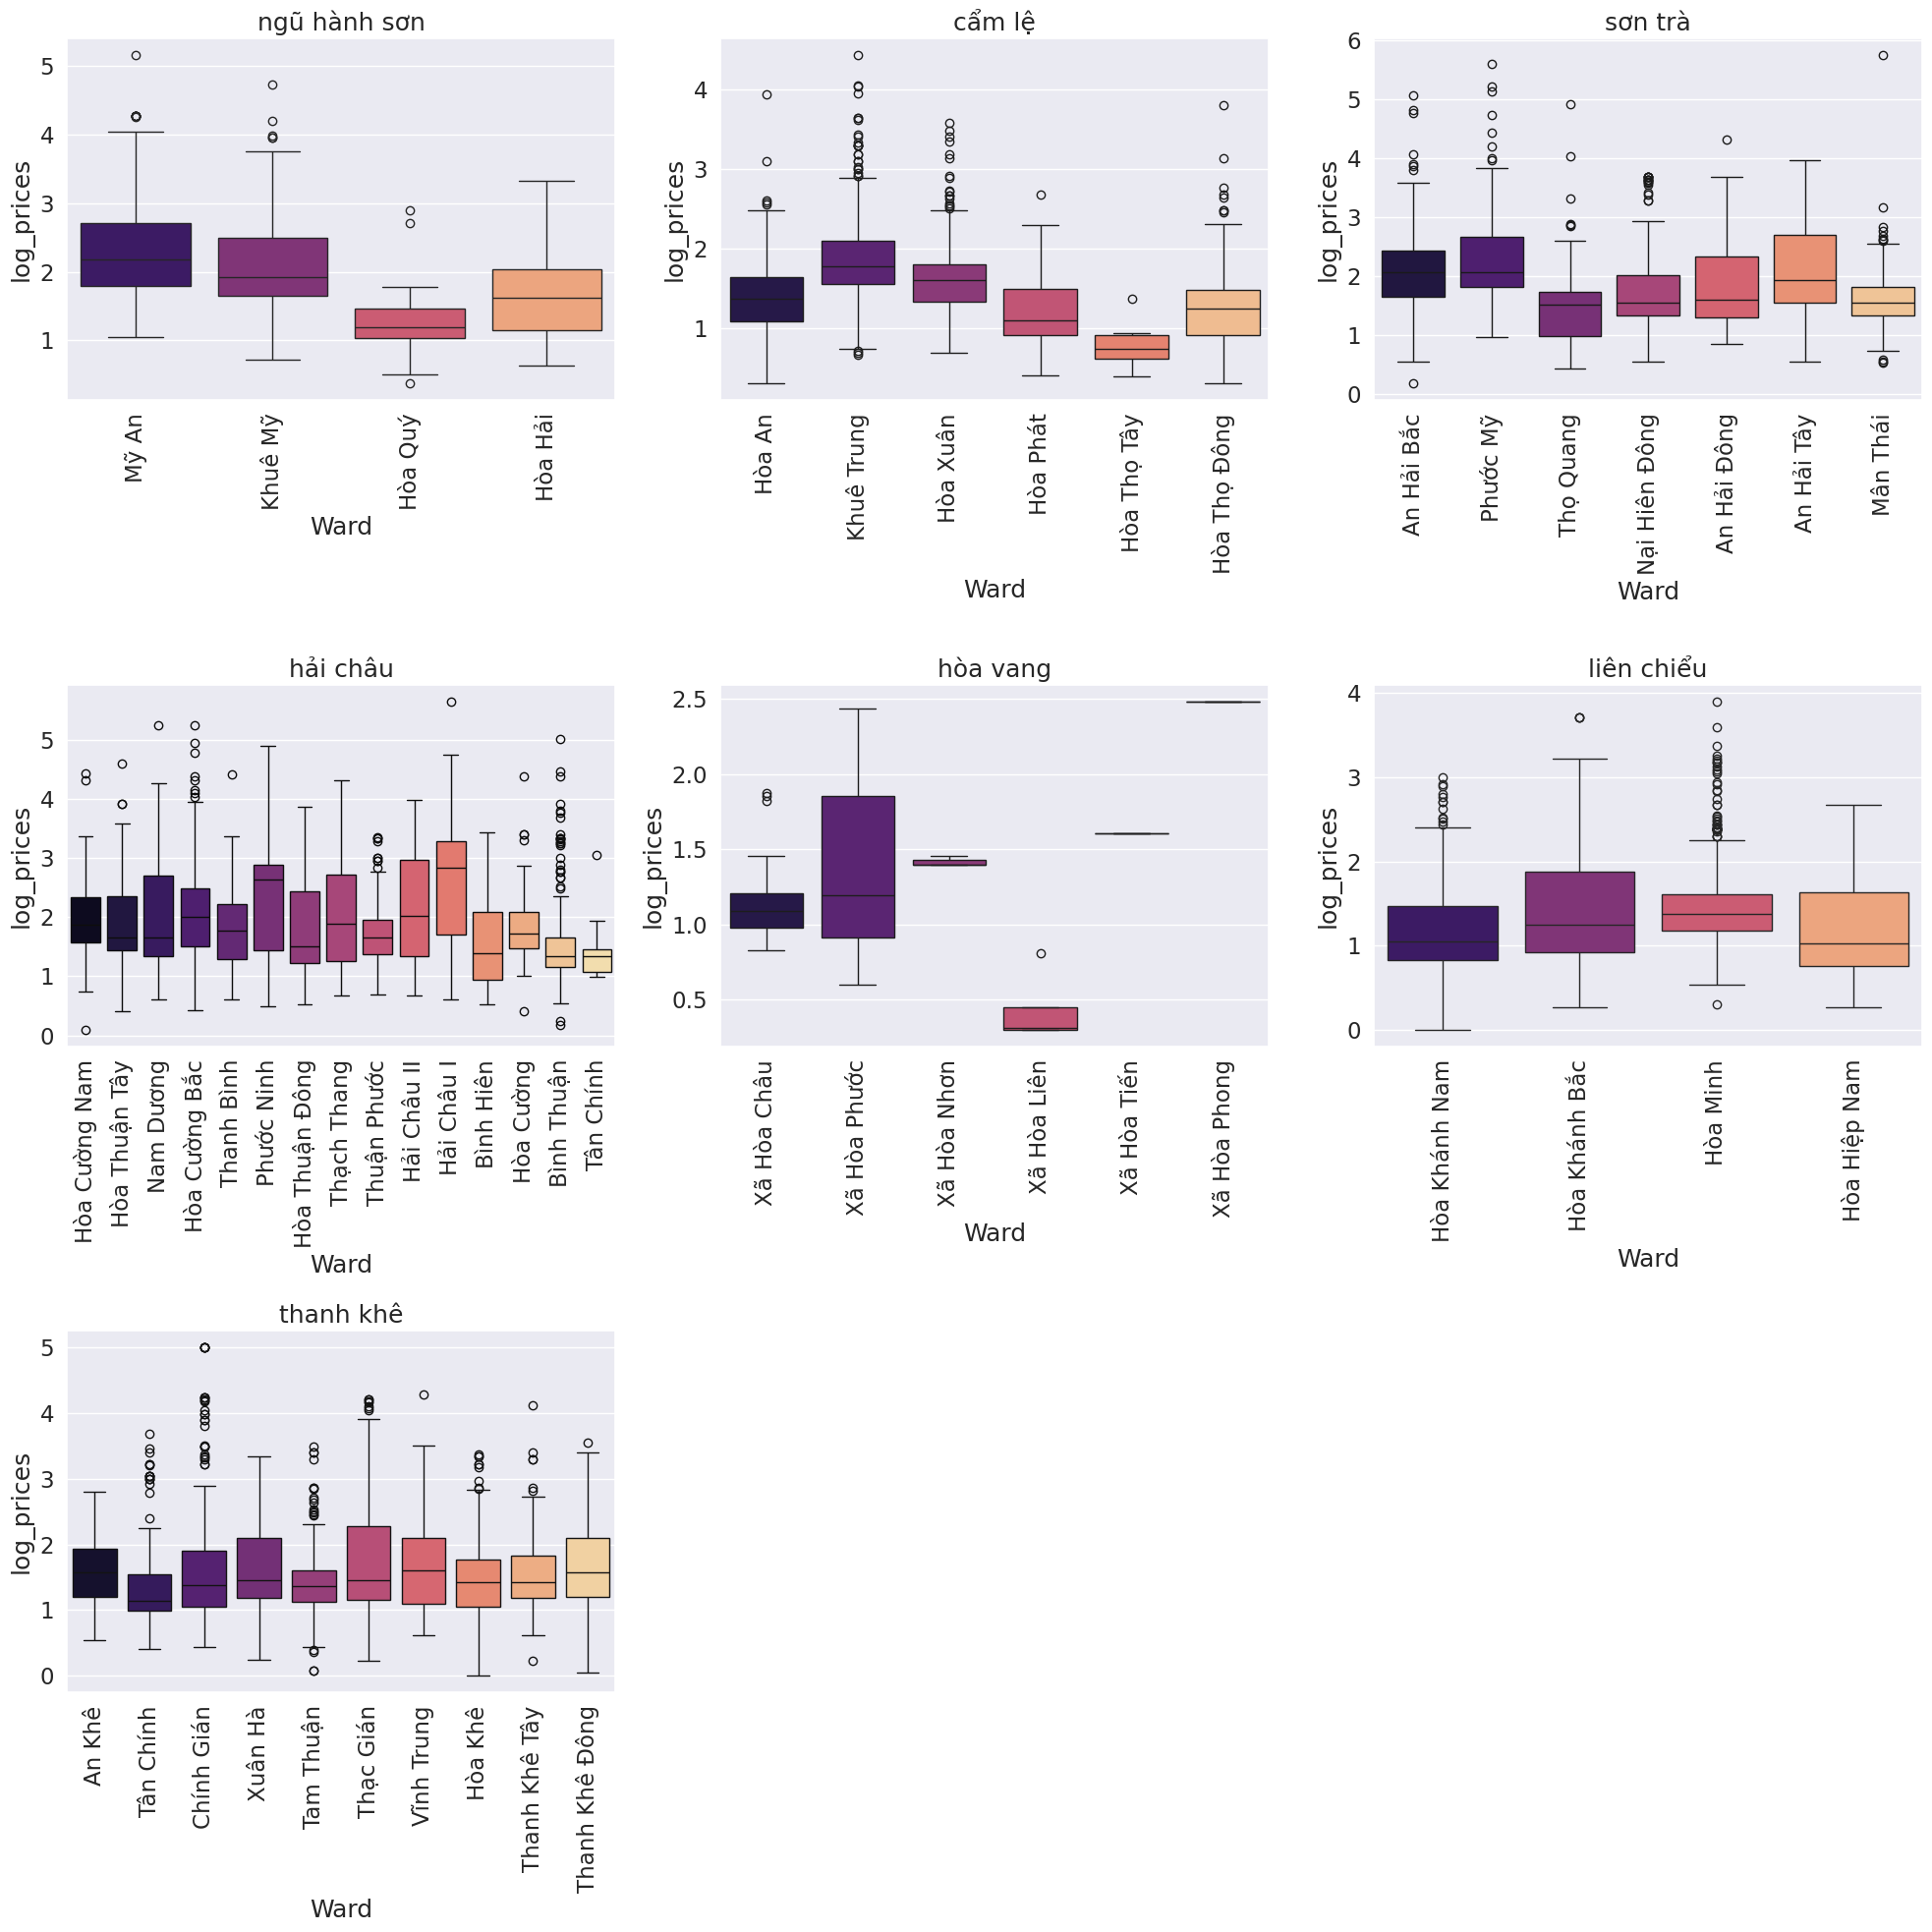

In [175]:
count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    #plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    sns.boxplot(x=PricesByWard['Ward'], y=PricesByWard['log_prices'], palette=("magma"), hue = PricesByWard['Ward'], legend = False)
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()

### Housing prices correlation with area, width, length

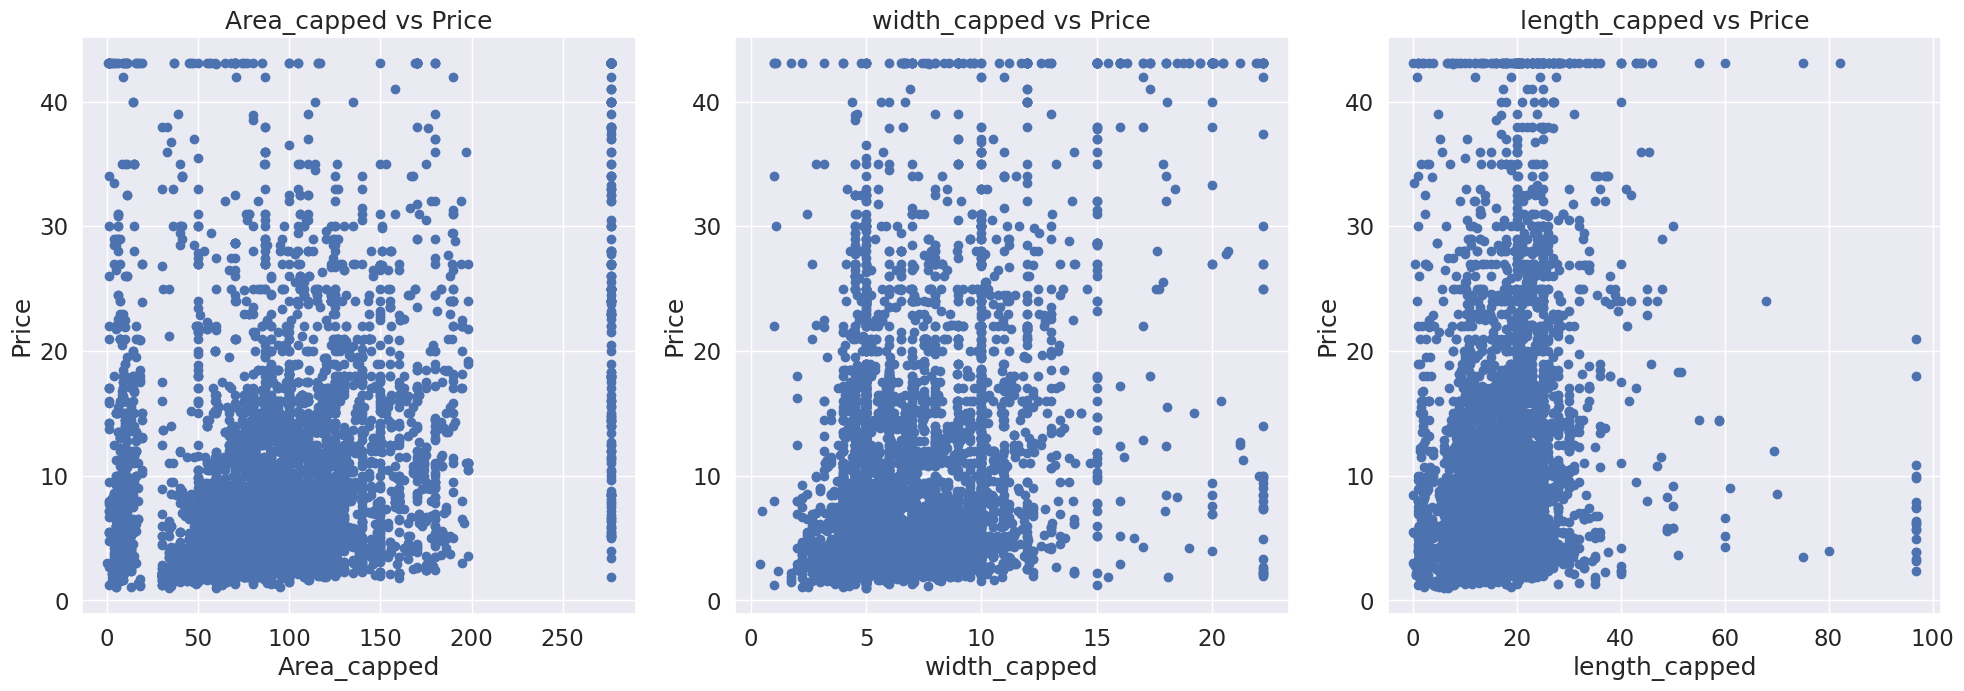

In [176]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['prices_capped'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area_capped', 1)
scatter('width_capped', 2)
scatter('length_capped', 3)
# scatter('Area', 1)
# scatter('log_width', 2)
# scatter('log_length', 3)

plt.tight_layout()


### Housing prices with distance

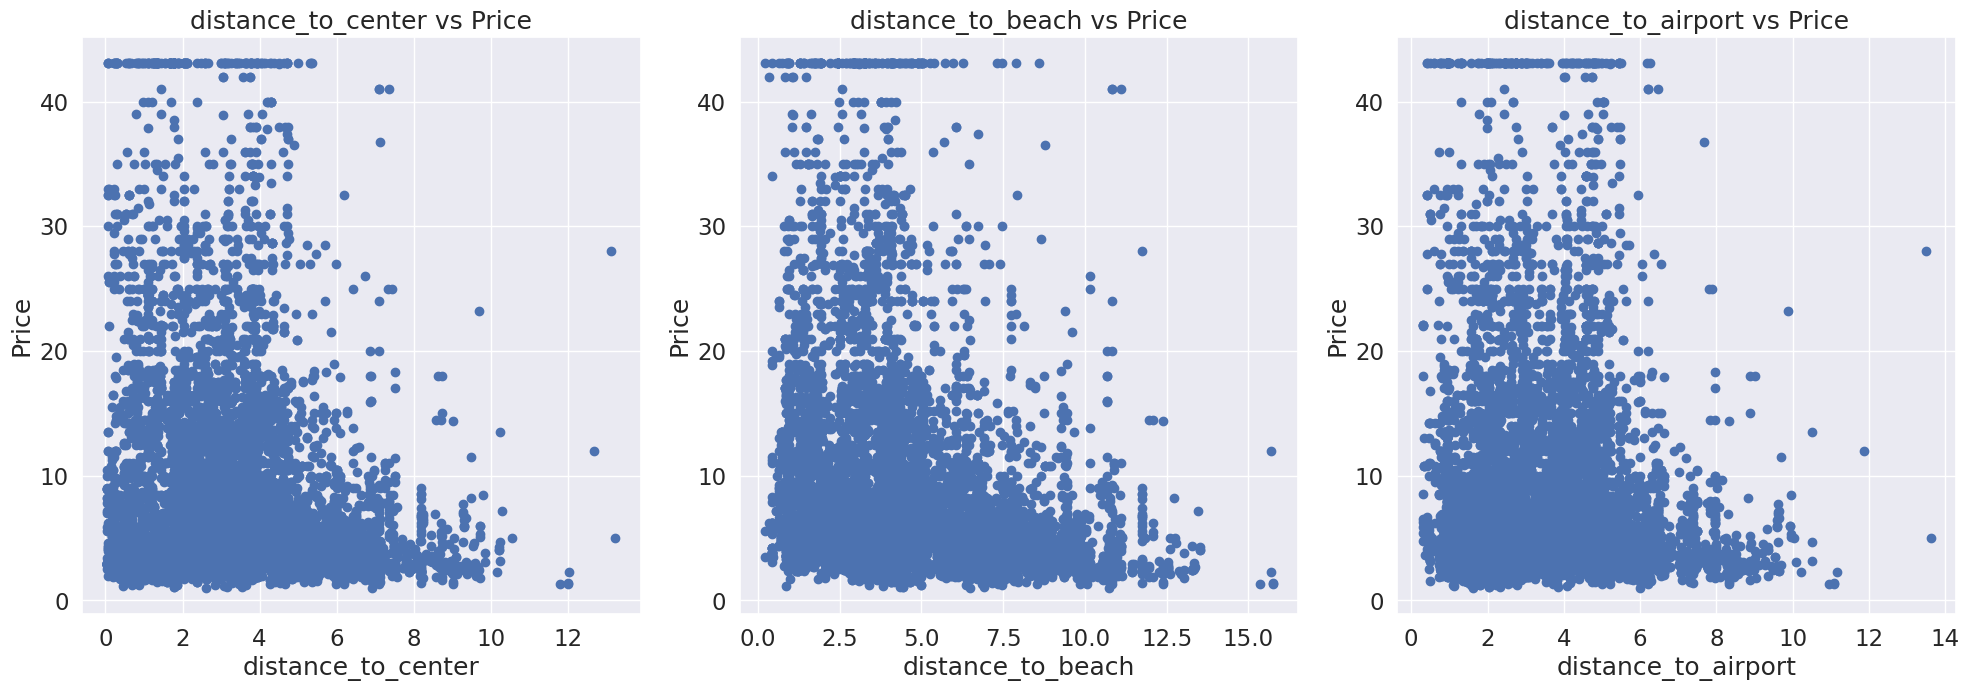

In [177]:
plt.figure(figsize=(20,20))

scatter('distance_to_center', 1)
scatter('distance_to_beach', 2)
scatter('distance_to_airport', 3)


plt.tight_layout()

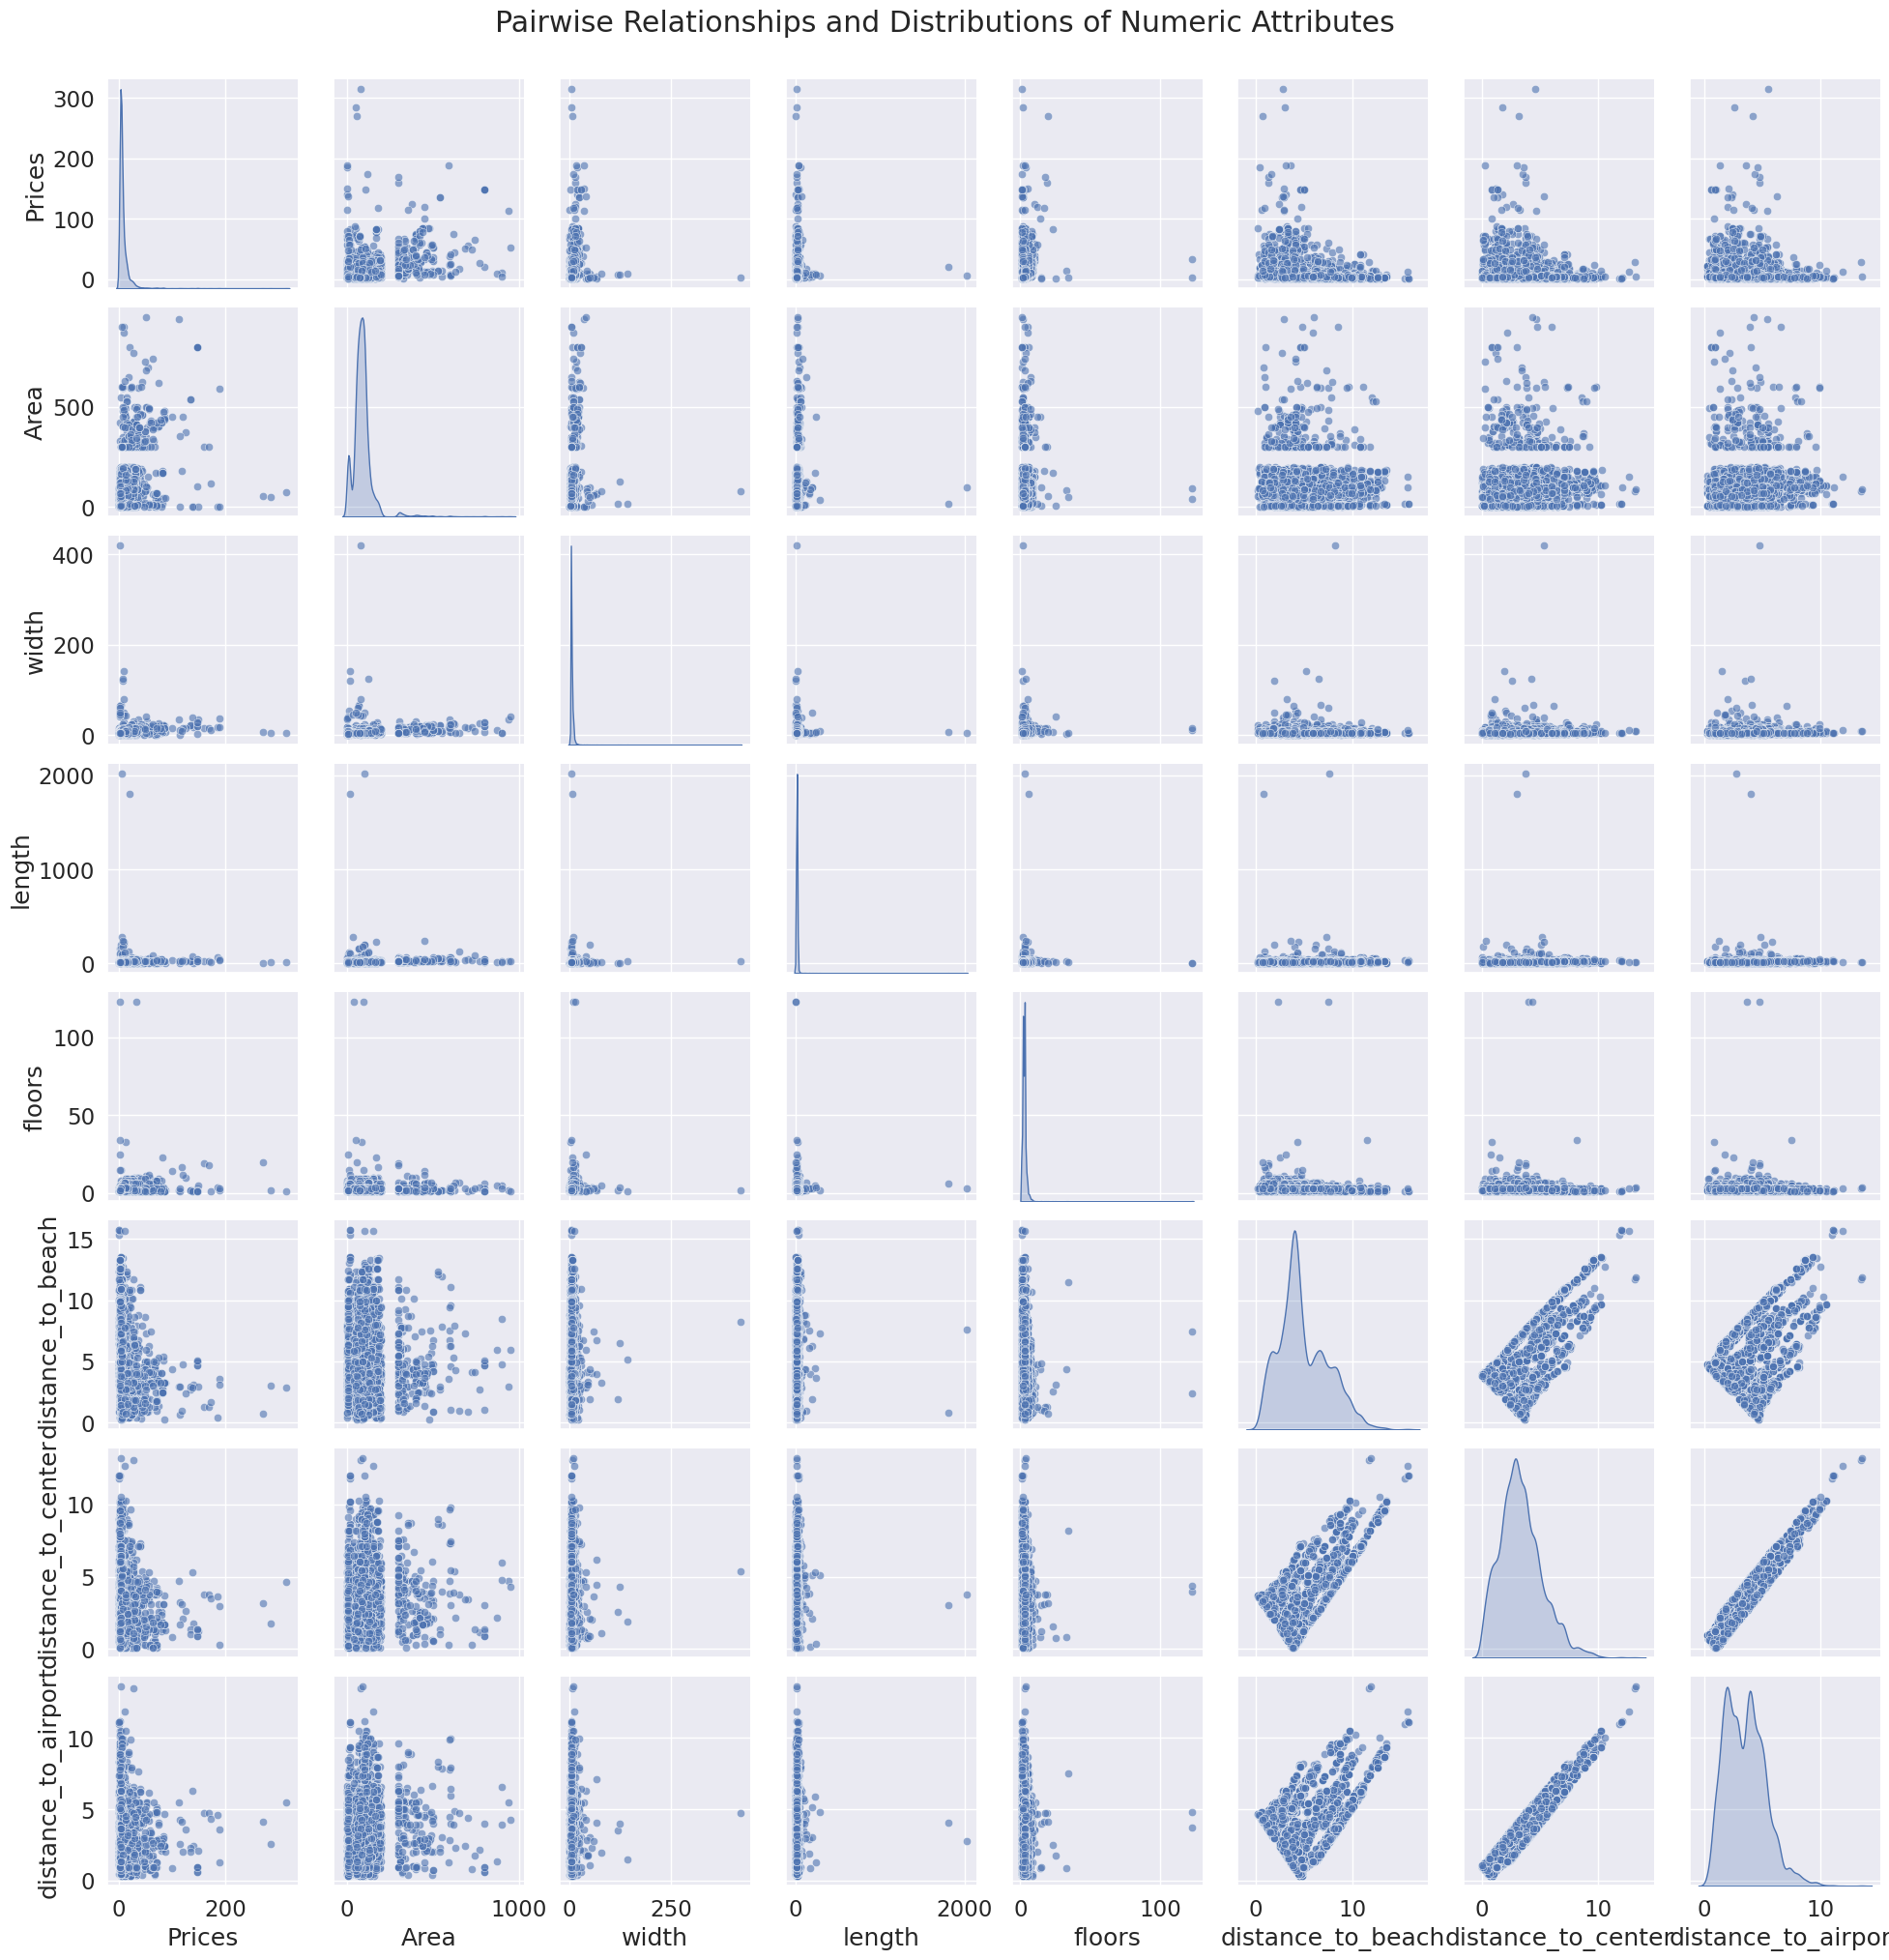

In [122]:
selected_columns = ['Prices', 'Area', 'width', 'length', 'floors', 'distance_to_beach', 'distance_to_center', 'distance_to_airport']

sns.pairplot(df[selected_columns], diag_kind="kde", plot_kws={'alpha': 0.6})

plt.suptitle("Pairwise Relationships and Distributions of Numeric Attributes", y=1.02)

plt.show()

### Correlation

<Axes: >

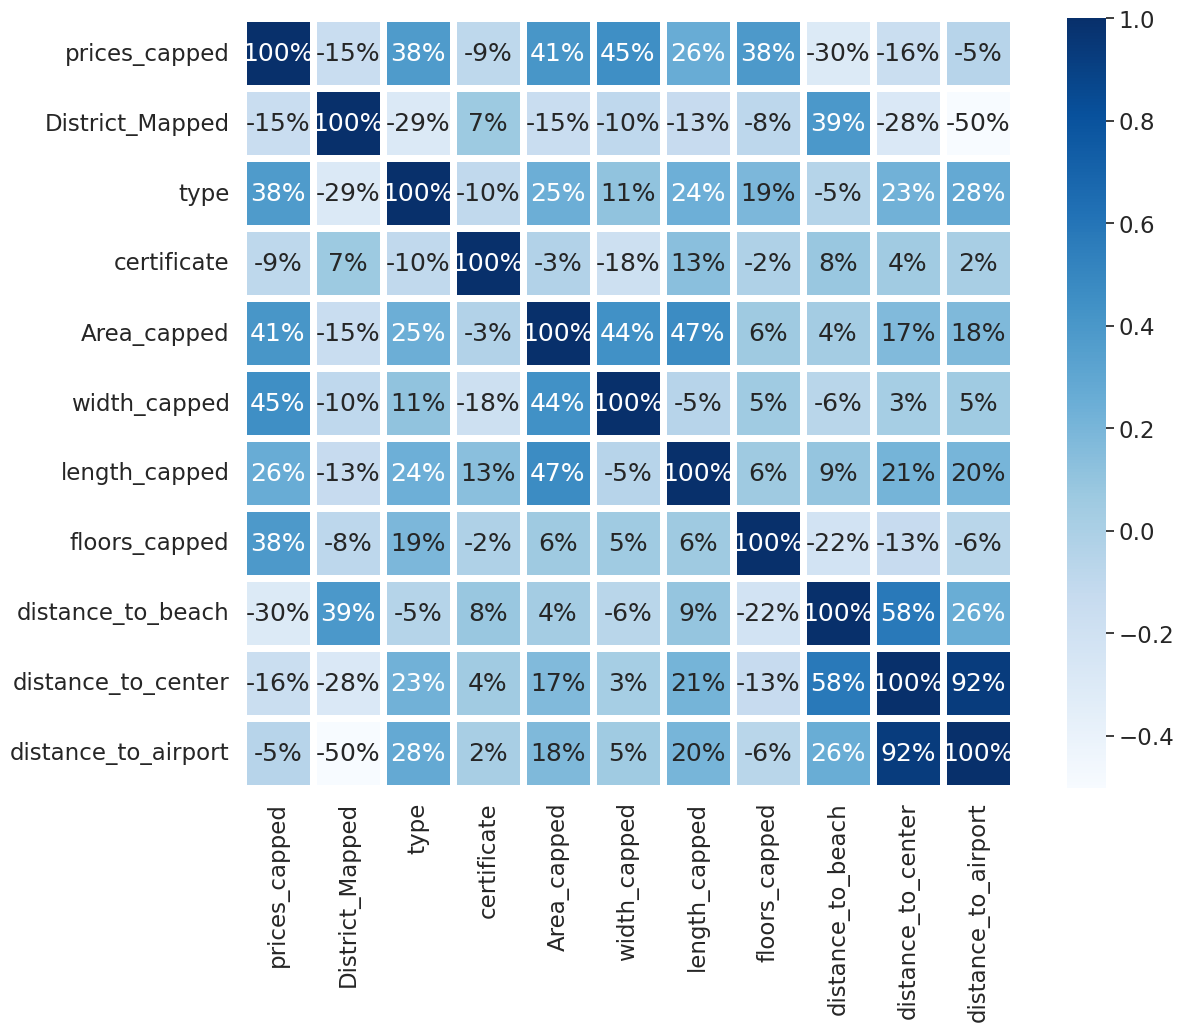

In [123]:
cols_pv = ['prices_capped','District_Mapped','type','certificate','Area_capped','width_capped','length_capped','floors_capped','distance_to_beach','distance_to_center','distance_to_airport']
plt.figure(figsize=(14, 10)) 
sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=5, square=True, cmap='Blues', fmt=".0%")

### Splitting data to train

In [83]:
from sklearn.preprocessing import StandardScaler,Normalizer,PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway, kruskal
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
cols = ['prices_capped','District_Mapped','type','certificate','Area_capped','width_capped','length_capped','floors_capped','distance_to_beach','distance_to_center','distance_to_airport']
house = df[cols]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=123)


In [41]:

print(df_train.shape)
print(df_test.shape)

(9029, 11)
(2258, 11)


In [42]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))


X_train: (9029, 11)
X_test: (2258, 11)


In [43]:
y_train = X_train.pop('prices_capped')
y_test = X_test.pop('prices_capped')
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (9029,)
y_test: (2258,)


In [44]:
scaler = StandardScaler()
X_train =  pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [45]:

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)


LinearRegression()

In [46]:
y_pred_LR  = model_LR.predict(X_test)

In [47]:
mae=mean_absolute_error(y_test,y_pred_LR)
mse = mean_squared_error(y_test, y_pred_LR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_LR)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 3.32
Mean Squared Error (MSE): 27.98
Root Mean Squared Error (RMSE): 5.29
R-squared (R2): 0.48


In [48]:
r2_scores_LR = cross_val_score(model_LR, X_train, y_train, cv=8, scoring=make_scorer(r2_score))
rmse_scores_LR = cross_val_score(model_LR, X_train, y_train, cv=8, scoring=make_scorer(mean_squared_error))
mae_scores_LR = cross_val_score(model_LR, X_train, y_train, cv=8, scoring=make_scorer(mean_absolute_error))

In [49]:
for i, score in enumerate(r2_scores_LR):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_LR))

Fold 1: 0.5440903937653975
Fold 2: 0.5679958723989054
Fold 3: 0.5079941368451726
Fold 4: 0.5400230368287965
Fold 5: 0.5612714125145771
Fold 6: 0.5075761530919745
Fold 7: 0.5406757375618578
Fold 8: 0.513261504351108
R2 Score: 0.5353610309197236


In [50]:
for i, score in enumerate(rmse_scores_LR):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_LR)))

Fold 1: 5.13292939400118
Fold 2: 5.064529450954517
Fold 3: 5.3519775480801055
Fold 4: 5.026321835613834
Fold 5: 4.787841100376141
Fold 6: 5.002924374821599
Fold 7: 4.951812492495363
Fold 8: 5.268122074333063
RMSE Score: 5.073307283834476


In [51]:
for i, score in enumerate(mae_scores_LR):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_LR))


Fold 1: 3.2751077435526983
Fold 2: 3.1970935368375657
Fold 3: 3.296231473533103
Fold 4: 3.2732950317053424
Fold 5: 3.161753002906071
Fold 6: 3.3213972337650275
Fold 7: 3.270153404933357
Fold 8: 3.2183072066986016
MAE Score: 3.251667329241471


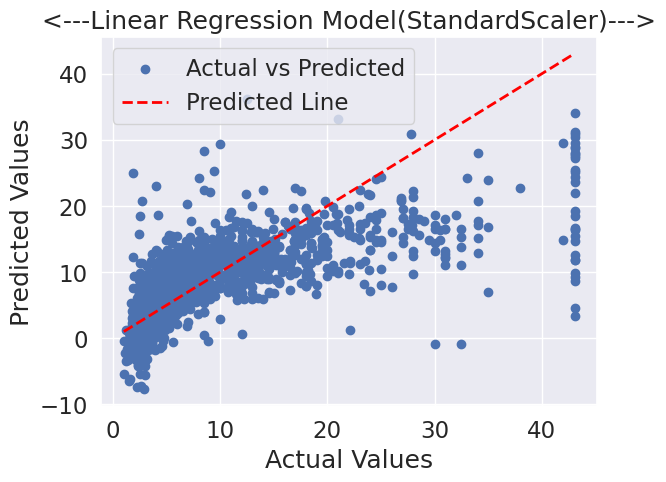

In [52]:
plt.scatter(y_test, y_pred_LR, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("<---Linear Regression Model(StandardScaler)--->")
plt.legend()
plt.show()

In [53]:
x = df[cols].drop('prices_capped',axis = 1)
y = df['prices_capped']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=233)

In [54]:
# scaler = Normalizer()
scaler =MinMaxScaler()
x_train =  pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test =  pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [55]:
model_MinMax = LinearRegression()
model_MinMax.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = model_MinMax.predict(x_test)

In [57]:
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 3.27
Mean Squared Error (MSE): 26.77
Root Mean Squared Error (RMSE): 5.17
R-squared (R2): 0.51


In [58]:
r2_scores_LR = cross_val_score(model_MinMax, x_train, y_train, cv=8, scoring=make_scorer(r2_score))
rmse_scores_LR = cross_val_score(model_MinMax, x_train, y_train, cv=8, scoring=make_scorer(mean_squared_error))
mae_scores_LR = cross_val_score(model_MinMax, x_train, y_train, cv=8, scoring=make_scorer(mean_absolute_error))

In [59]:
for i, score in enumerate(r2_scores_LR):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_LR))

Fold 1: 0.540986044797422
Fold 2: 0.5171256503848762
Fold 3: 0.5098980429076474
Fold 4: 0.5024470200989442
Fold 5: 0.5184384231052965
Fold 6: 0.5468692953069624
Fold 7: 0.5368829360395813
Fold 8: 0.5575887264377055
R2 Score: 0.5287795173848044


In [60]:
for i, score in enumerate(rmse_scores_LR):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_LR)))

Fold 1: 5.122418891093264
Fold 2: 5.571941030478991
Fold 3: 4.724095813010959
Fold 4: 5.057779492468731
Fold 5: 5.117903682627187
Fold 6: 4.950765226386199
Fold 7: 5.454667192204089
Fold 8: 4.745550370680673
RMSE Score: 5.093140212368762


In [61]:
for i, score in enumerate(mae_scores_LR):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_LR))

Fold 1: 3.1747389439853286
Fold 2: 3.4675152225554857
Fold 3: 3.1681569427855285
Fold 4: 3.1952653029290574
Fold 5: 3.2897389104278796
Fold 6: 3.294734567228052
Fold 7: 3.423163095802406
Fold 8: 3.144246325519978
MAE Score: 3.269694913904215


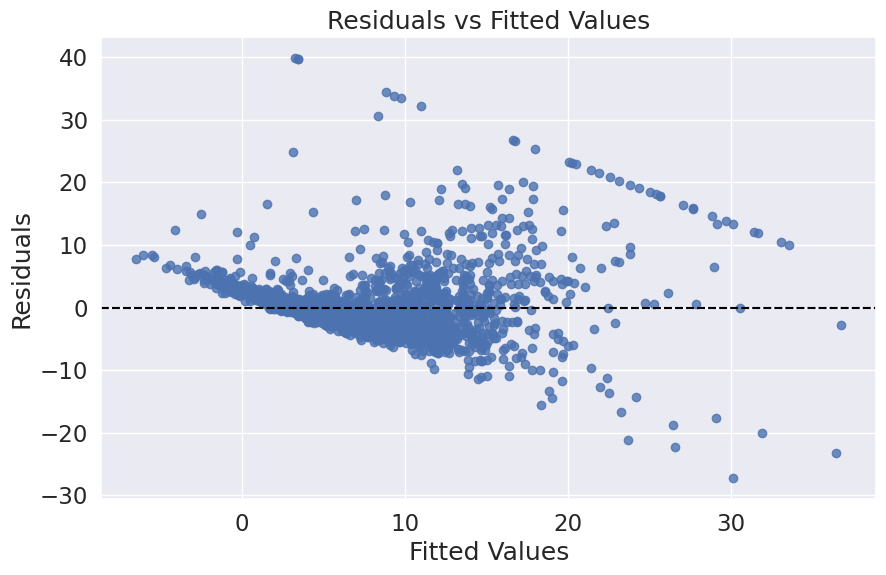

In [62]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Text(0.5, 0, 'Residuals')

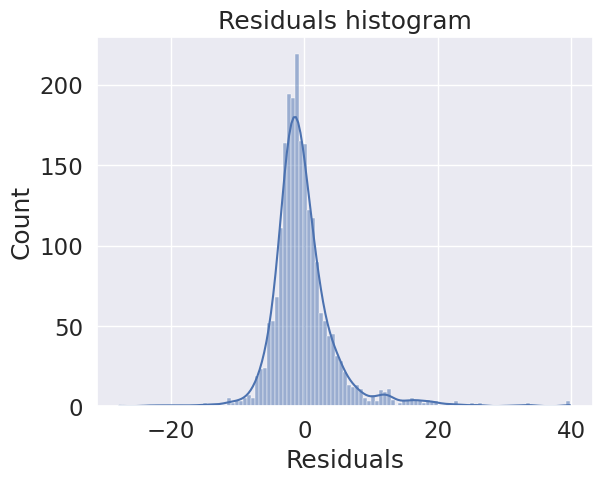

In [63]:
sns.histplot(residuals, kde="True" )
plt.title('Residuals histogram')
plt.xlabel('Residuals')

In [64]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
print(vif)

   VIF Factor             features
0    6.147777      District_Mapped
1    3.915470                 type
2    4.021829          certificate
3    7.537361          Area_capped
4    6.735955         width_capped
5    8.324573        length_capped
6    3.039810        floors_capped
7   31.113650    distance_to_beach
8  155.320217   distance_to_center
9  103.937400  distance_to_airport


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
print(vif)

   VIF Factor             features
0    6.147777      District_Mapped
1    3.915470                 type
2    4.021829          certificate
3    7.537361          Area_capped
4    6.735955         width_capped
5    8.324573        length_capped
6    3.039810        floors_capped
7   31.113650    distance_to_beach
8  155.320217   distance_to_center
9  103.937400  distance_to_airport


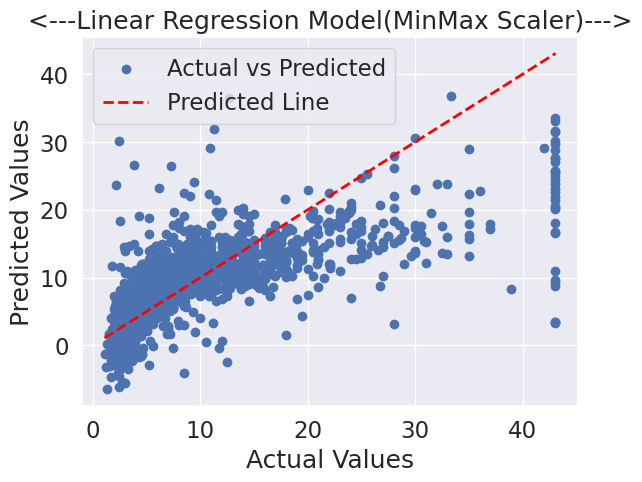

In [66]:
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("<---Linear Regression Model(MinMax Scaler)--->")
plt.legend()
plt.show()

In [67]:
x = df[cols].drop('prices_capped',axis = 1)
y = df['prices_capped']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=233)

In [68]:
pipeline = Pipeline([
    ('normalizer', Normalizer()),  
    ('scaler', StandardScaler()),   
    ('regressor', LinearRegression())
])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [69]:
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 4.07
Mean Squared Error (MSE): 39.58
Root Mean Squared Error (RMSE): 6.29
R-squared (R2): 0.27


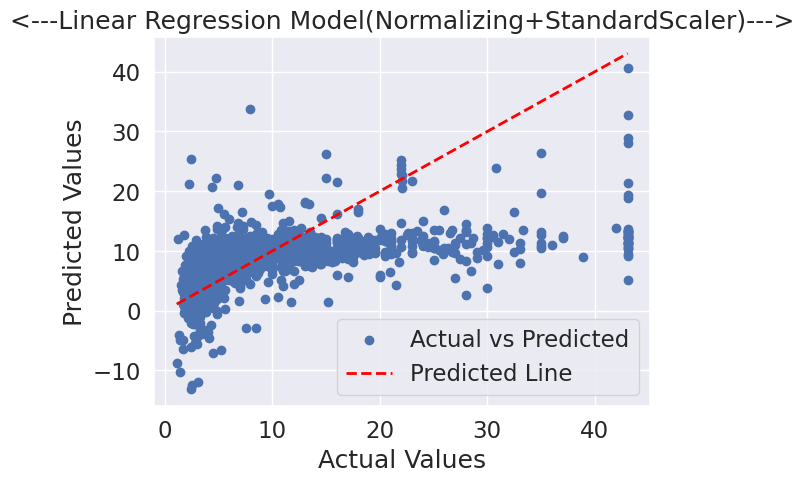

In [70]:
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("<---Linear Regression Model(Normalizing+StandardScaler)--->")
plt.legend()
plt.show()

### For without the distances

In [71]:
cols = ['prices_capped','District_Mapped','type','certificate','Area_capped','width_capped','length_capped','floors_capped']
cols_no_cap = ['Prices']

In [72]:
x = df[cols].drop('prices_capped',axis = 1)
y = df['prices_capped']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=233)

In [73]:
scaler =StandardScaler()
x_train =  pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test =  pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [74]:
model_rmcols = LinearRegression()
model_rmcols.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred = model_rmcols.predict(x_test)

In [76]:
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 3.51
Mean Squared Error (MSE): 30.60
Root Mean Squared Error (RMSE): 5.53
R-squared (R2): 0.44


### ANOVA test on different districts(excluded district 6)

In [77]:
data_subset = df[cols]

In [78]:
data_subset_filtered = data_subset[data_subset['District_Mapped'] != 5]
# Verify the number of data points in each remaining district after dropping District 6

district_counts_filtered = data_subset_filtered['District_Mapped'].value_counts()

district_counts_filtered

District_Mapped
4    3282
7    2067
3    1752
2    1509
1    1332
6    1293
Name: count, dtype: int64

In [79]:
district_groups_filtered = [group['prices_capped'].values for name, group in data_subset_filtered.groupby('District_Mapped')]
anova_district_filtered = f_oneway(*district_groups_filtered)
kruskal_result = kruskal(*district_groups_filtered)
kruskal_result

KruskalResult(statistic=np.float64(1481.086657992505), pvalue=np.float64(0.0))

In [80]:
from scipy.stats import ttest_ind


unique_types = data_subset_filtered['type'].unique()

unique_certificates = data_subset_filtered['certificate'].unique()
unique_types, unique_certificates
type_group_0 = data_subset_filtered[data_subset_filtered['type'] == 0]['prices_capped']
type_group_1 = data_subset_filtered[data_subset_filtered['type'] == 1]['prices_capped']
t_test_type = ttest_ind(type_group_0, type_group_1, equal_var=False)

certificate_group_0 = data_subset_filtered[data_subset_filtered['certificate'] == 0]['prices_capped']
certificate_group_1 = data_subset_filtered[data_subset_filtered['certificate'] == 1]['prices_capped']
t_test_certificate = ttest_ind(certificate_group_0, certificate_group_1, equal_var=False)

t_test_type, t_test_certificate

(TtestResult(statistic=np.float64(-60.57145878161577), pvalue=np.float64(0.0), df=np.float64(10188.553078649678)),
 TtestResult(statistic=np.float64(9.050677760532485), pvalue=np.float64(2.1313165622250506e-19), df=np.float64(4183.190423708581)))

## Model when removing outliers

In [233]:
df_2 = pd.read_csv("df_test.csv",encoding = "utf-8")

In [235]:
def remove_outliers(df_copy, column_names, threshold=3):

    for column in column_names:
        # Calculate Z-scores
        z_scores = stats.zscore(df_copy[column])
        print(z_scores)
        # Filter out rows with Z-scores beyond the threshold

        df_copy = df_copy[(abs(z_scores) < threshold)]
        
        
    return df_copy

columns_to_clean = ['Prices', 'Area','width', 'length', 'floors']
                    
cleaned_data_Z = remove_outliers(df_2, columns_to_clean)


0       -0.374730
1       -0.444026
2        0.569423
3       -0.166843
4        0.222945
           ...   
11282   -0.400716
11283    0.482804
11284   -0.483005
11285   -0.353075
11286   -0.470878
Name: Prices, Length: 11287, dtype: float64
0       -0.452370
1        0.102346
2        1.267249
3        0.102346
4        0.287251
           ...   
11282   -0.267465
11283    1.396682
11284   -0.637275
11285   -0.507841
11286   -0.267465
Name: Area, Length: 11140, dtype: float64
0       -0.269222
1       -0.173022
2        0.019377
3        1.558572
4       -0.173022
           ...   
11282   -0.269222
11283    0.788975
11284   -0.173022
11285   -0.173022
11286   -0.173022
Name: width, Length: 10979, dtype: float64
0       -0.049988
1        0.061801
2        0.397166
3       -0.348091
4        0.136326
           ...   
11282   -0.012725
11283   -0.012725
11284   -0.236302
11285   -0.161777
11286   -0.087251
Name: length, Length: 10959, dtype: float64
0        1.124284
1       -0.338796

In [237]:
cols = ['Prices','District_Mapped','type','certificate','Area','width','length','floors','distance_to_beach','distance_to_center','distance_to_airport']
cols_no_cap = ['Prices']

In [240]:
x = cleaned_data_Z[cols].drop('Prices',axis = 1)
y = cleaned_data_Z['Prices']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=233)

In [241]:
scaler =StandardScaler()
x_train =  pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test =  pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [242]:
model_outliers= LinearRegression()
model_outliers.fit(x_train, y_train)

LinearRegression()

In [244]:
y_pred = model_outliers.predict(x_test)

In [245]:
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 2.74
Mean Squared Error (MSE): 17.52
Root Mean Squared Error (RMSE): 4.19
R-squared (R2): 0.51


In [246]:
def remove_outliers_iqr(df, column_names, multiplier=1.5):

    df_copy = df.copy() 
    for column in column_names:
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
        
    return df_copy

cleaned_data_iqr = remove_outliers_iqr(df_2, columns_to_clean)


In [247]:
cleaned_data_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8316 entries, 1 to 11286
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Prices               8316 non-null   float64
 1   Area                 8316 non-null   float64
 2   toFace               8316 non-null   object 
 3   type                 8316 non-null   int64  
 4   certificate          8316 non-null   int64  
 5   width                8316 non-null   float64
 6   length               8316 non-null   float64
 7   floors               8316 non-null   int64  
 8   Latitude             8316 non-null   float64
 9   Longitude            8316 non-null   float64
 10  Street               8316 non-null   object 
 11  Ward                 8316 non-null   object 
 12  District             8316 non-null   object 
 13  District_Mapped      8316 non-null   int64  
 14  distance_to_beach    8316 non-null   float64
 15  distance_to_center   8316 non-null   float

In [248]:
x = cleaned_data_iqr[cols].drop('Prices',axis = 1)
y = cleaned_data_iqr['Prices']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=233)

In [249]:
scaler =StandardScaler()
x_train =  pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test =  pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [250]:
model_outliers_iqr= LinearRegression()
model_outliers_iqr.fit(x_train, y_train)

LinearRegression()

In [251]:
y_pred = model_outliers_iqr.predict(x_test)

In [252]:
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 1.57
Mean Squared Error (MSE): 4.85
Root Mean Squared Error (RMSE): 2.20
R-squared (R2): 0.49
